## Importing the relevant libraries

In [1]:
!pip install scikit-learn-intelex
!pip install catboost
!pip install feature-engine
!pip install tensorflow
!pip install lightgbm xgboost
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
import warnings, gc
warnings.filterwarnings('ignore')
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from scipy.stats import probplot
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from subprocess import call
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DACN3/data/160city_116960rows.csv')
df.head()

Mounted at /content/drive


name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Manama  2023-01-01     21.0     17.9  19.5          21.0          17.9   
1  Manama  2023-01-02     18.6     14.9  16.5          18.6          14.9   
2  Manama  2023-01-03     18.9     14.9  17.1          18.9          14.9   
3  Manama  2023-01-04     22.2     15.9  18.5          22.2          15.9   
4  Manama  2023-01-05     19.9     15.9  18.1          19.9          15.9   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       19.5  12.5      64.2  ...         13.6      6.0        10.0   
1       16.5  12.9      79.7  ...          6.5      3.0        10.0   
2       17.1  12.0      71.9  ...         10.0      5.0        10.0   
3       18.5  15.3      81.6  ...          6.6      3.0        10.0   
4       18.1  15.9      86.8  ...          4.2      2.0        10.0   

               sunrise               sunset  moonphase  \
0  2023-01-01T06:25:21  2023-01-01T16:56:58       0.31   
1  2023-01-02T06:25:37  2023-01-02T16:57:38       0.34   
2  2023-01-03T06:25:52  2023-01-03T16:58:19       0.38   
3  2023-01-04T06:26:06  2023-01-04T16:59:01       0.41   
4  2023-01-05T06:26:18  2023-01-05T16:59:43       0.45   

               conditions                                        description  \
0        Partially cloudy                  Partly cloudy throughout the day.   
1  Rain, Partially cloudy        Partly cloudy throughout the day with rain.   
2  Rain, Partially cloudy  Partly cloudy throughout the day with a chance...   
3  Rain, Partially cloudy  Partly cloudy throughout the day with rain in ...   
4  Rain, Partially cloudy  Partly cloudy throughout the day with a chance...   

                icon                                           stations  
0  partly-cloudy-day  OEDR,41150099999,40416099999,41160099999,OEDF,...  
1               rain  OEDR,WDJ4009,41150099999,40416099999,WLPI,4116...  
2               rain  OEDR,WDJ4009,41150099999,40416099999,WLPI,4116...  
3               rain  OEDR,WDJ4009,41150099999,40416099999,WLPI,4116...  
4               rain  OEDR,41150099999,40416099999,WLPI,41160099999,...  

[5 rows x 33 columns]

In [4]:
df.shape

(116960, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116960 entries, 0 to 116959
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              116960 non-null  object 
 1   datetime          116960 non-null  object 
 2   tempmax           116960 non-null  float64
 3   tempmin           116960 non-null  float64
 4   temp              116960 non-null  float64
 5   feelslikemax      116960 non-null  float64
 6   feelslikemin      116960 non-null  float64
 7   feelslike         116960 non-null  float64
 8   dew               116960 non-null  float64
 9   humidity          116960 non-null  float64
 10  precip            116960 non-null  float64
 11  precipprob        116960 non-null  int64  
 12  precipcover       116960 non-null  float64
 13  preciptype        56717 non-null   object 
 14  snow              116960 non-null  float64
 15  snowdepth         116952 non-null  float64
 16  windgust          11

In [6]:
df.describe()

tempmax        tempmin           temp   feelslikemax  \
count  116960.000000  116960.000000  116960.000000  116960.000000   
mean       24.725276      14.519738      19.387650      26.288150   
std        12.057044      12.690504      12.156139      14.334943   
min       -48.400000     -53.900000     -51.500000     -48.400000   
25%        19.000000       7.600000      13.000000      19.000000   
50%        28.200000      18.000000      23.200000      28.500000   
75%        32.800000      24.200000      28.000000      36.700000   
max        51.000000      38.800000      44.700000      70.200000   

        feelslikemin      feelslike            dew       humidity  \
count  116960.000000  116960.000000  116960.000000  116960.000000   
mean       14.029444      19.930371      10.867398      64.095253   
std        14.658146      14.257778      12.375333      20.336120   
min       -60.700000     -51.600000     -55.800000       3.500000   
25%         6.200000      12.875000       3.100000      51.100000   
50%        18.000000      23.100000      12.000000      68.500000   
75%        24.200000      29.900000      22.000000      80.100000   
max        50.400000      54.600000      29.900000     100.000000   

              precip     precipprob  ...      windspeed        winddir  \
count  116960.000000  116960.000000  ...  116960.000000  116960.000000   
mean        2.943316      42.391416  ...      19.714357     184.775951   
std        10.522630      49.417915  ...       9.583537     104.591586   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...      13.000000      90.500000   
50%         0.000000       0.000000  ...      18.400000     193.300000   
75%         1.000000     100.000000  ...      25.200000     275.300000   
max       428.578000     100.000000  ...     302.000000     360.000000   

       sealevelpressure     cloudcover     visibility  solarradiation  \
count     116960.000000  116960.000000  114289.000000   116959.000000   
mean        1013.204796      46.497929      13.313623      199.174424   
std            7.574794      30.369345       7.133651       81.857870   
min          971.800000       0.000000       0.000000        0.000000   
25%         1008.400000      20.200000       9.300000      140.800000   
50%         1012.300000      46.300000      10.400000      207.000000   
75%         1017.600000      71.900000      18.300000      262.300000   
max         1061.600000     100.000000      50.000000      396.100000   

         solarenergy        uvindex    severerisk      moonphase  
count  116959.000000  116959.000000  94076.000000  116960.000000  
mean       17.187796       6.953018     18.341479       0.485151  
std         7.067846       2.318581     17.120174       0.288159  
min         0.000000       0.000000      3.000000       0.000000  
25%        12.100000       6.000000     10.000000       0.250000  
50%        17.900000       7.000000     10.000000       0.500000  
75%        22.600000       9.000000     15.000000       0.750000  
max        34.500000      10.000000    100.000000       0.980000  

[8 rows x 24 columns]

In [7]:
df.isna().sum()

name                    0
datetime                0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype          60243
snow                    0
snowdepth               8
windgust                0
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility           2671
solarradiation          1
solarenergy             1
uvindex                 1
severerisk          22884
sunrise                 0
sunset                  0
moonphase               0
conditions              0
description             0
icon                    0
stations                0
dtype: int64

In [8]:
df['preciptype'].fillna('no precipitation', inplace=True)
df['severerisk'].fillna(0, inplace=True)

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
df['quarter'] = df['datetime'].dt.to_period('Q')

# Với solarradiation:
df['solarradiation'] = df.groupby(['name', 'quarter'])['solarradiation']\
    .transform(lambda x: x.fillna(round(x.mean(), 1)))

# Với solarenergy:
df['solarenergy'] = df.groupby(['name', 'quarter'])['solarenergy']\
    .transform(lambda x: x.fillna(round(x.mean(), 1)))

# Với snowdepth:
df['snowdepth'] = df.groupby(['name', 'quarter'])['snowdepth']\
    .transform(lambda x: x.fillna(round(x.mean(), 1)))

df.drop(columns='quarter', inplace=True)


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

df['quarter'] = df['datetime'].dt.to_period('Q')   # quý
df['year_month'] = df['datetime'].dt.to_period('M') # tháng

# Bước 1: Fill theo name + quarter (3 tháng)
df['visibility'] = df.groupby(['name', 'quarter'])['visibility']\
    .transform(lambda x: x.fillna(round(x.mean(), 1)))

# Bước 2: Fill theo name + year_month (12 tháng)
df['visibility'] = df.groupby(['name', 'year_month'])['visibility']\
    .transform(lambda x: x.fillna(round(x.mean(), 1)))

# Nếu còn null, fill theo name
df['visibility'] = df.groupby('name')['visibility']\
    .transform(lambda x: x.fillna(round(x.mean(), 1)))

# Nếu vẫn còn, fill bằng mean toàn dataset
df['visibility'] = df['visibility'].fillna(round(df['visibility'].mean(), 1))

df.drop(columns=['quarter', 'year_month'], inplace=True)

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

df['year_month'] = df['datetime'].dt.to_period('M')

# Xử lý uvindex
def fill_mode(series):
    if series.isnull().all():
        return series  # Nếu toàn bộ là null thì để nguyên
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value.iloc[0])  # Lấy giá trị mode đầu tiên
    else:
        return series

df['uvindex'] = df.groupby(['name', 'year_month'])['uvindex'].transform(fill_mode)

df.drop(columns='year_month', inplace=True)

In [12]:
df.isna().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

Skewness of tempmax: -1.3272590413330194
Kurtosis of tempmax: 2.271610075165941


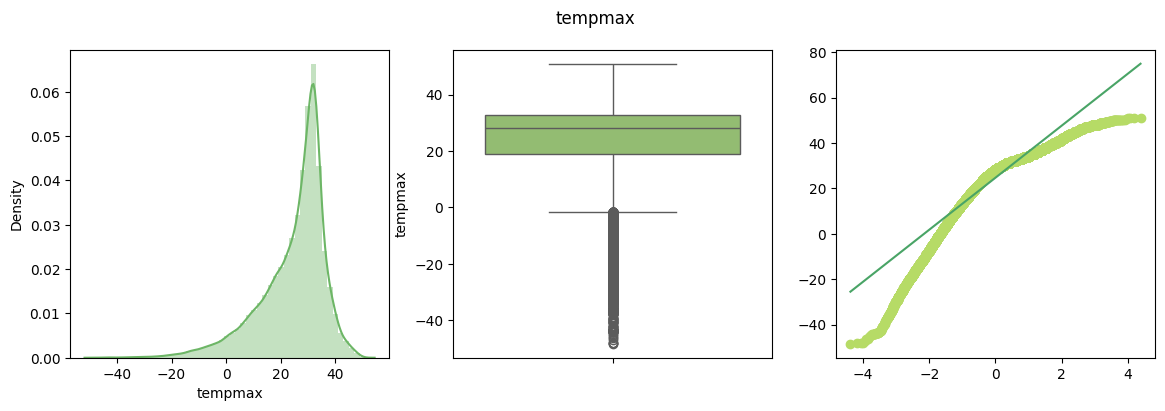

Skewness of tempmin: -1.2553425325274434
Kurtosis of tempmin: 1.705139985243994


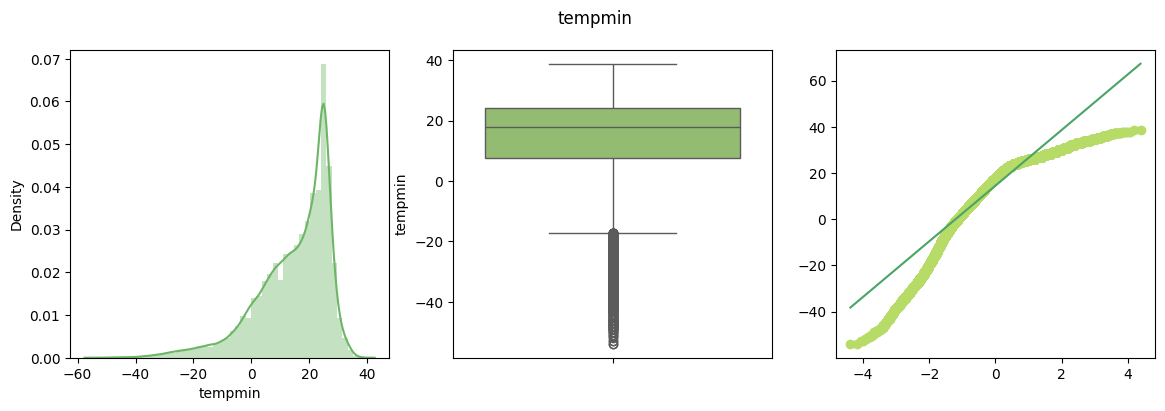

Skewness of temp: -1.331916982604127
Kurtosis of temp: 2.0825236365519633


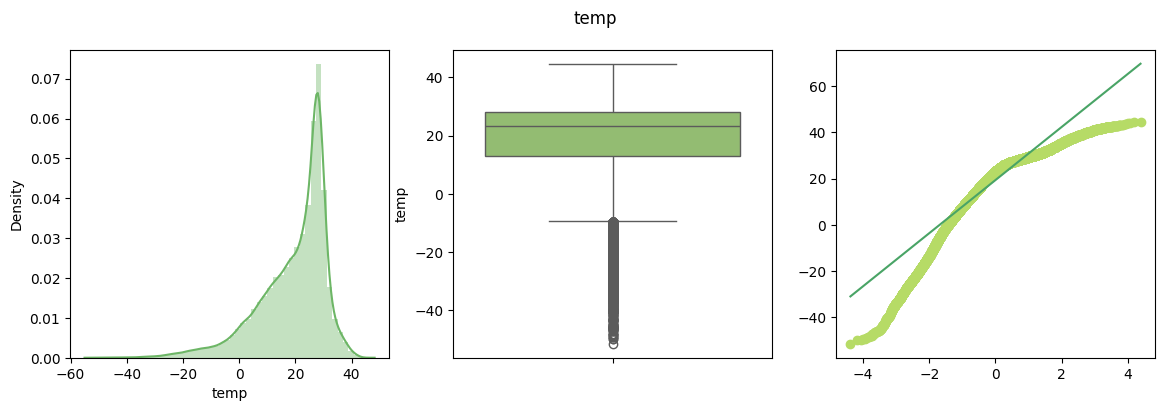

Skewness of feelslikemax: -1.034922406583645
Kurtosis of feelslikemax: 1.4280772614859751


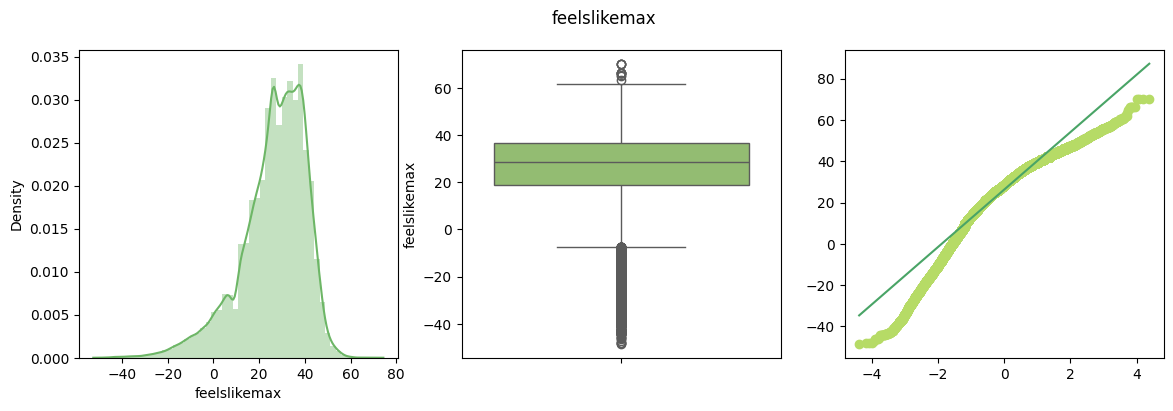

Skewness of feelslikemin: -1.2210763162887728
Kurtosis of feelslikemin: 1.7694692132801197


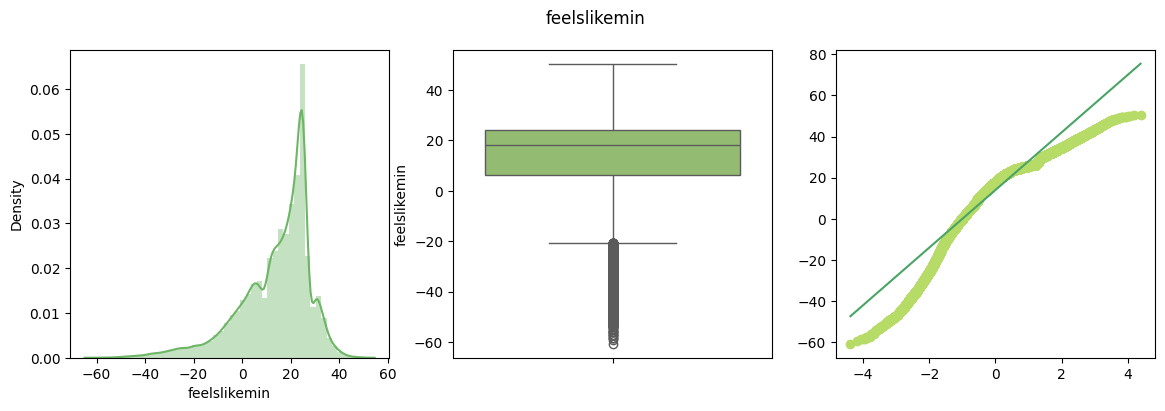

Skewness of feelslike: -1.165472769057577
Kurtosis of feelslike: 1.6930373160208472


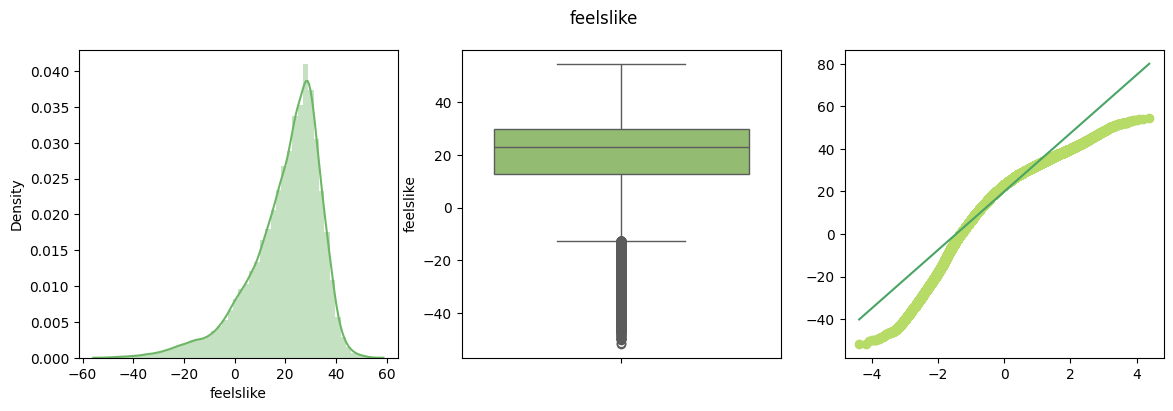

Skewness of dew: -0.8648545262864569
Kurtosis of dew: 0.6901339254534284


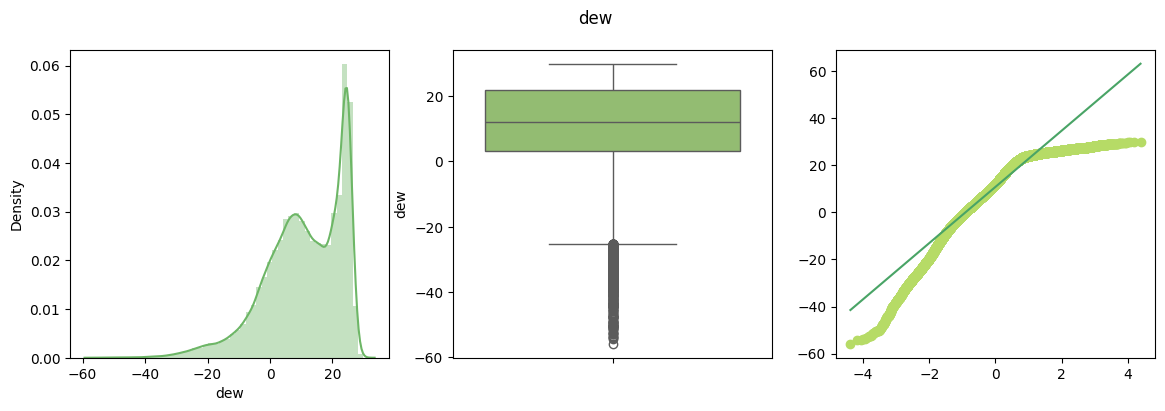

Skewness of humidity: -0.7130056740738685
Kurtosis of humidity: -0.28200360210737285


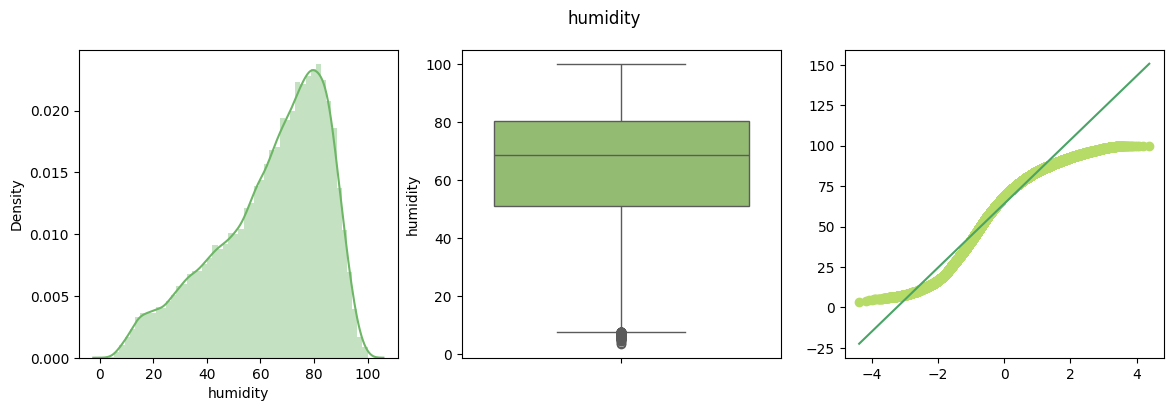

Skewness of precip: 9.121131632723989
Kurtosis of precip: 147.93327641668785


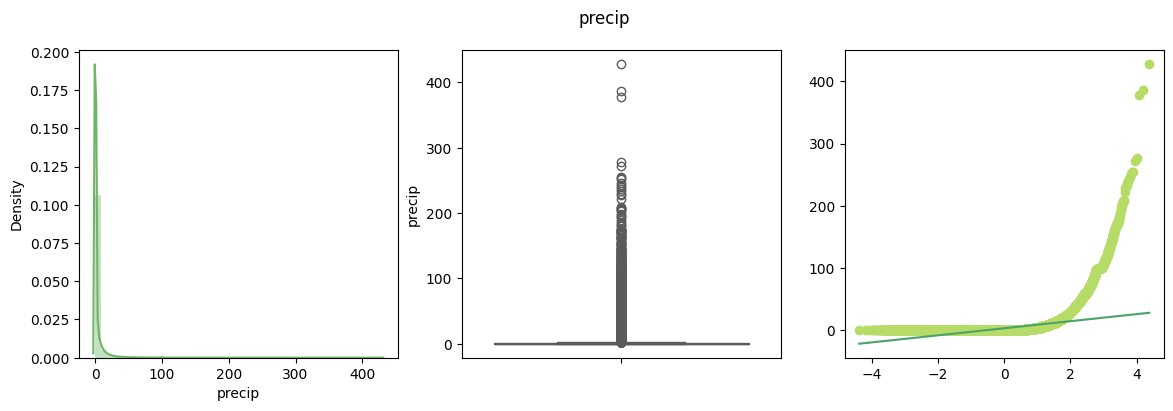

Skewness of precipprob: 0.30793343798935663
Kurtosis of precipprob: -1.9052095768836015


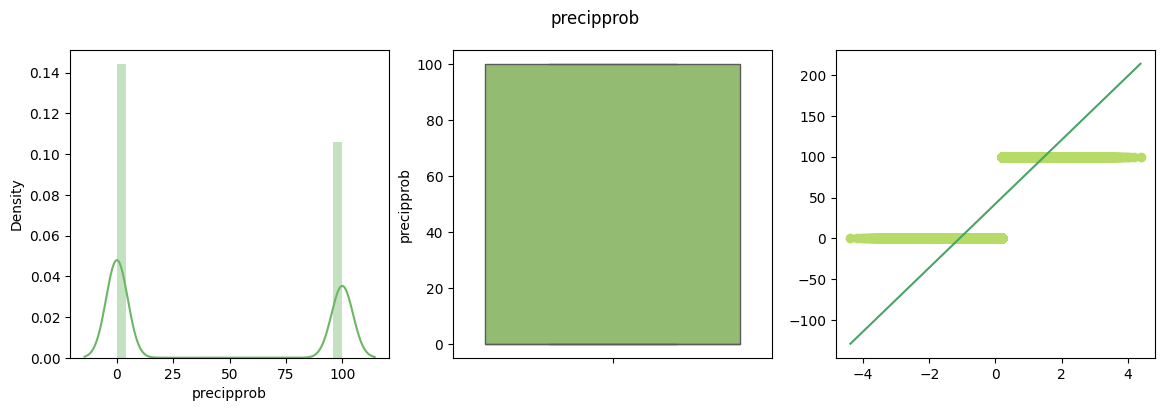

Skewness of precipcover: 2.787824681744269
Kurtosis of precipcover: 7.698300638024861


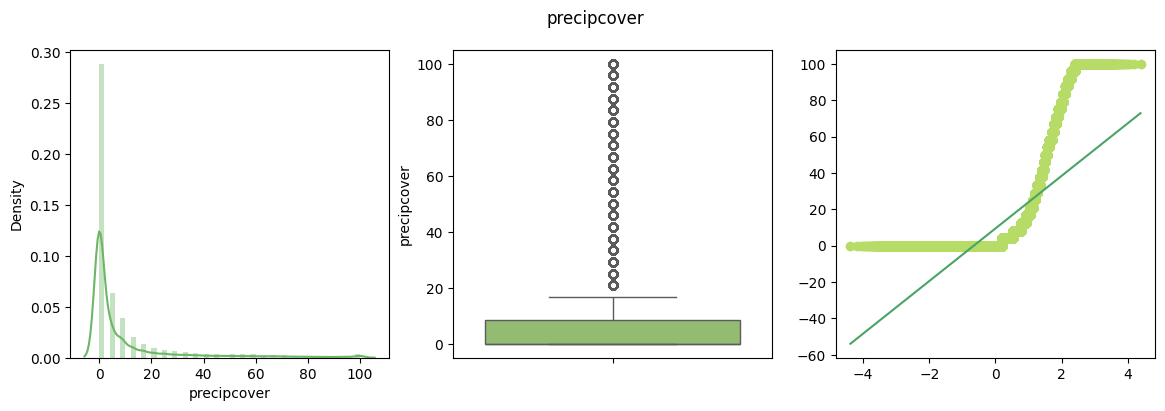

Skewness of snow: 16.819085207158498
Kurtosis of snow: 410.6742508755374


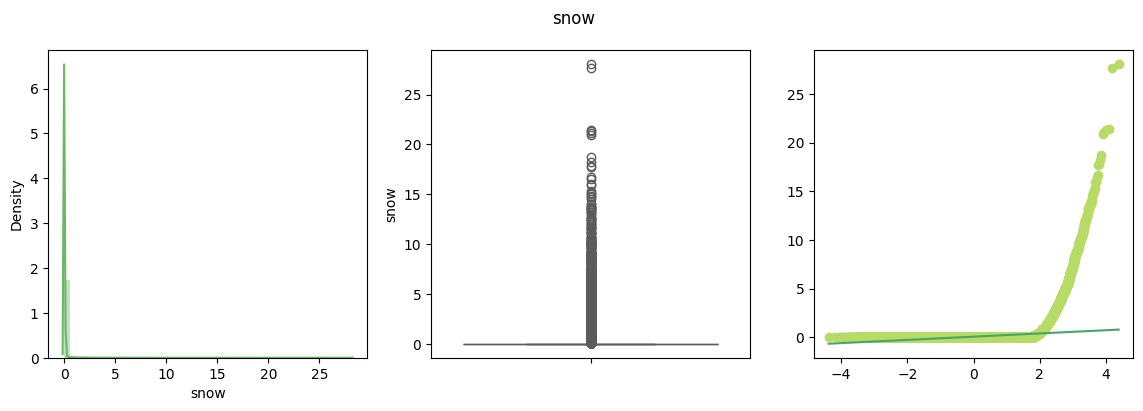

Skewness of snowdepth: 6.253769607922571
Kurtosis of snowdepth: 46.02638317221591


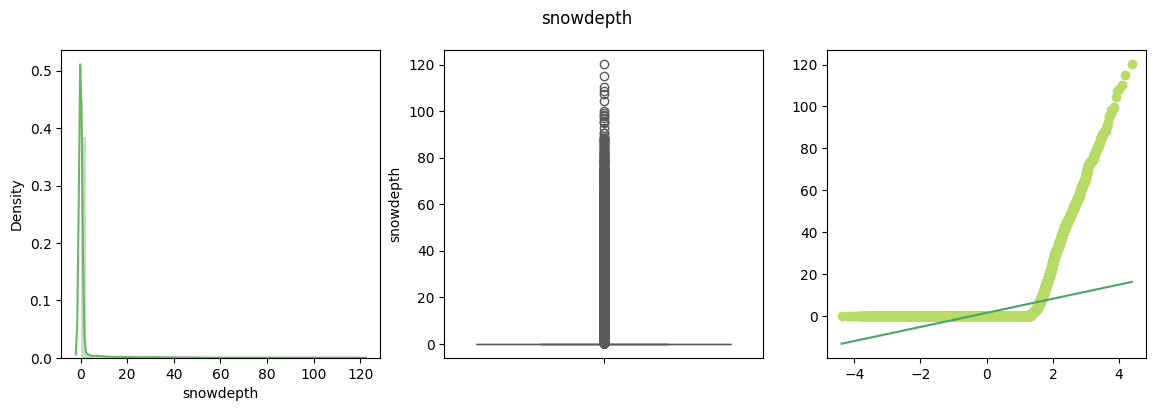

Skewness of windgust: 1.2736265482370397
Kurtosis of windgust: 5.508673806595585


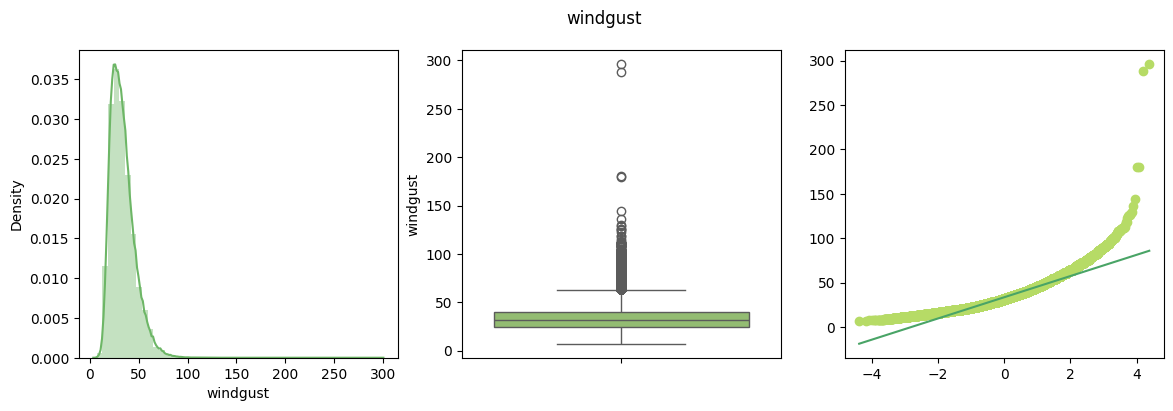

Skewness of windspeed: 2.1648399380226717
Kurtosis of windspeed: 26.055890902653562


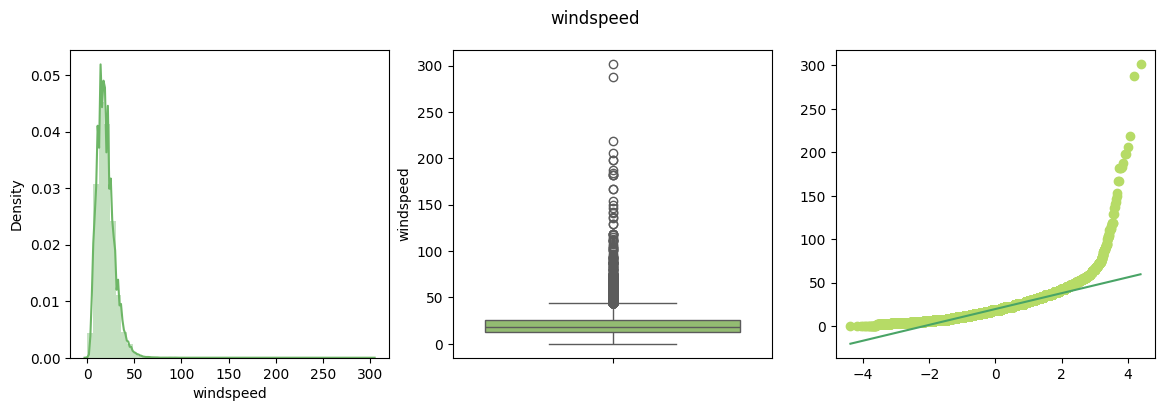

Skewness of winddir: -0.08144146190725703
Kurtosis of winddir: -1.251550240146332


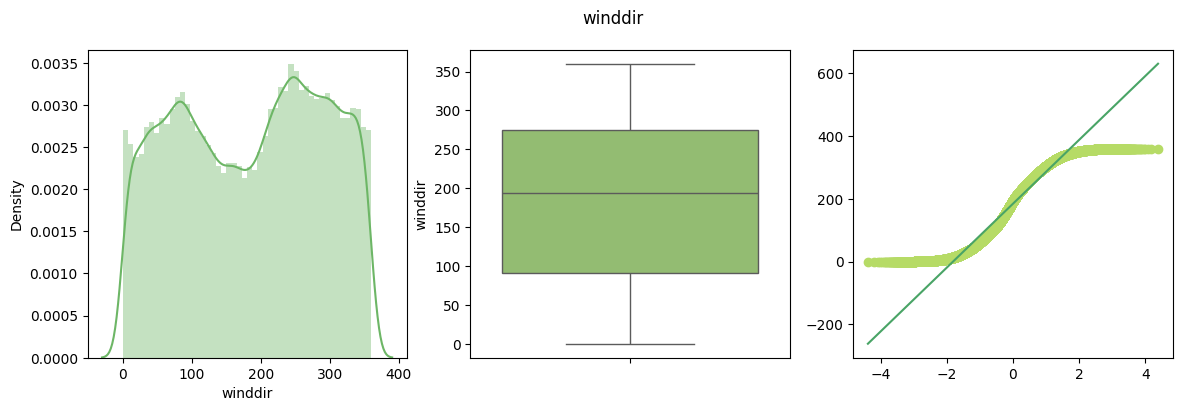

Skewness of sealevelpressure: 0.6475482050673415
Kurtosis of sealevelpressure: 1.5944330772281816


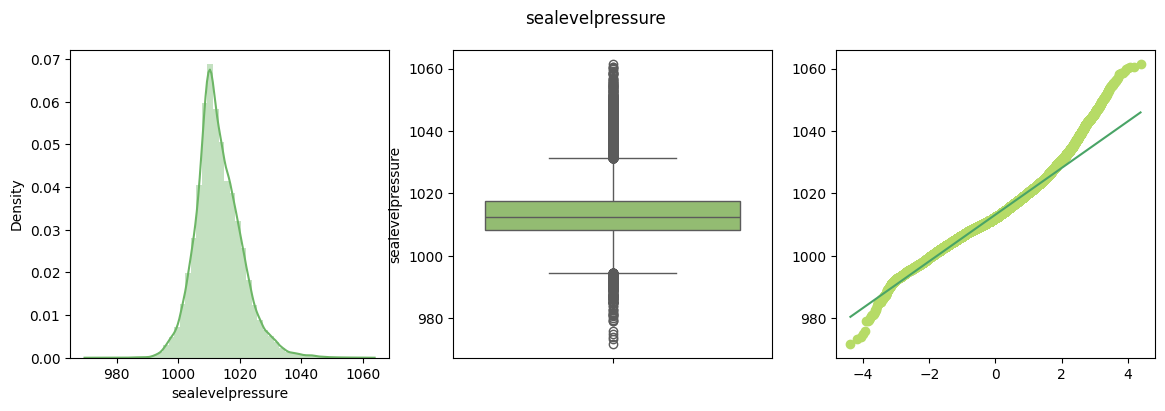

Skewness of cloudcover: 0.06609464431729711
Kurtosis of cloudcover: -1.1708328631713893


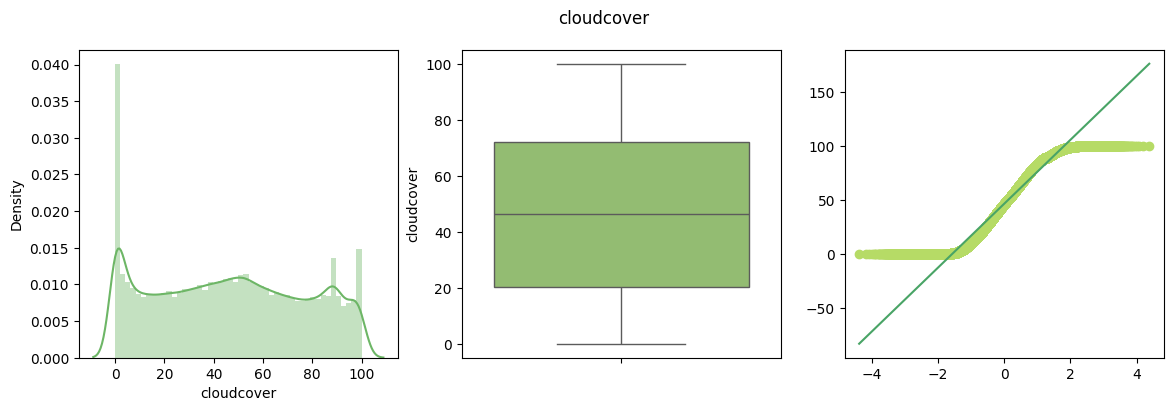

Skewness of visibility: 1.4640233515464307
Kurtosis of visibility: 3.96575755756057


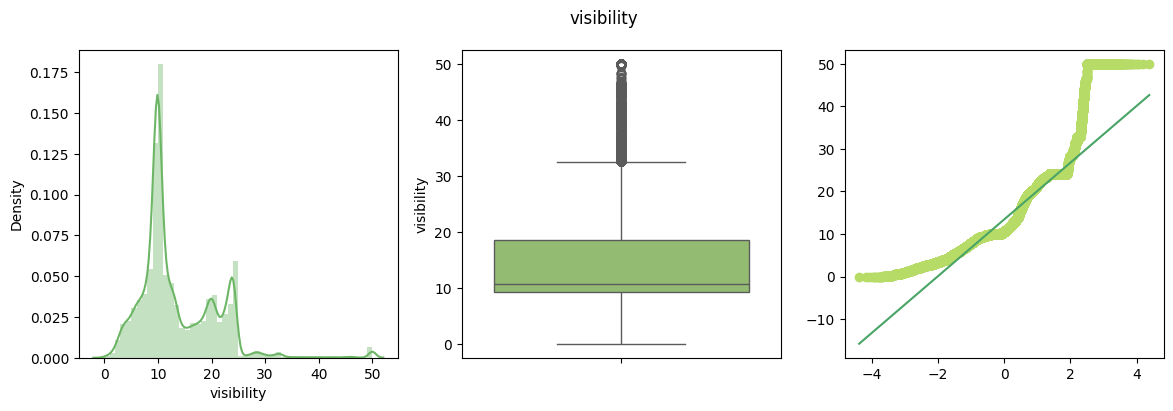

Skewness of solarradiation: -0.323579013283151
Kurtosis of solarradiation: -0.6309825825837883


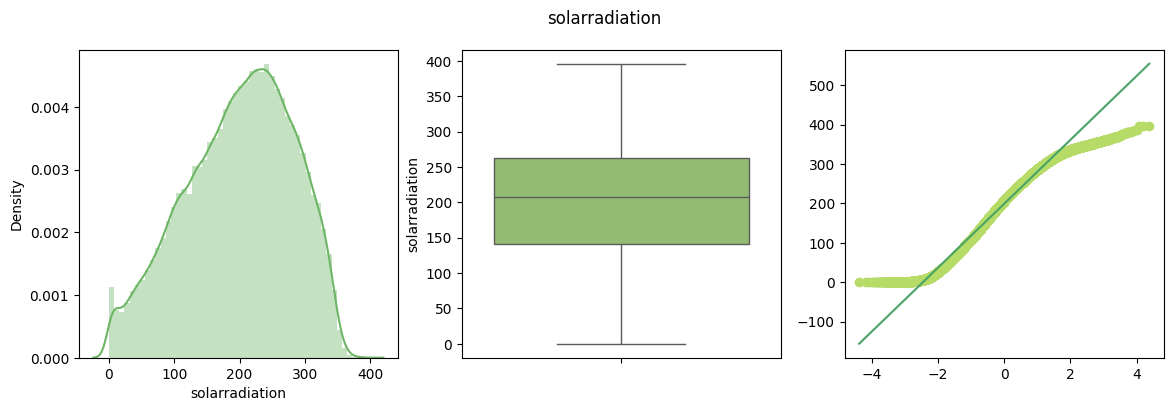

Skewness of solarenergy: -0.327827394781823
Kurtosis of solarenergy: -0.6311381694494278


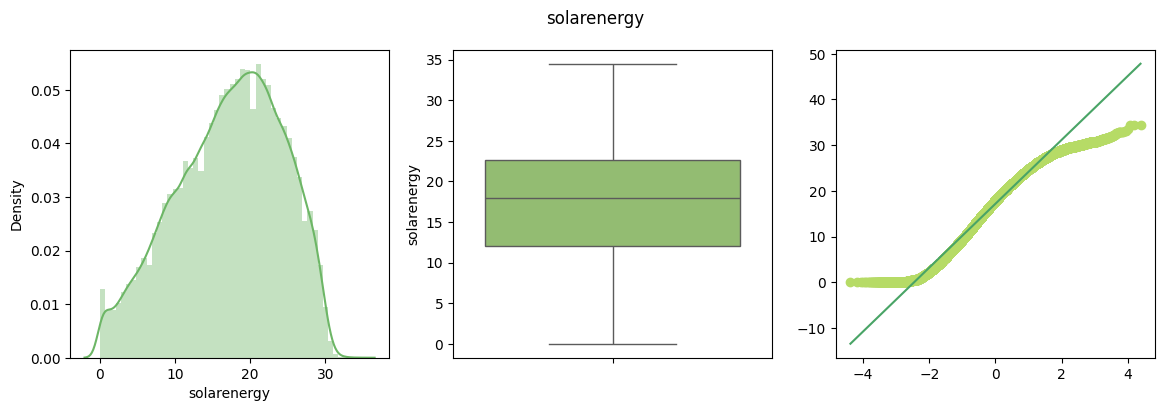

Skewness of uvindex: -0.8371516569860549
Kurtosis of uvindex: 0.16349568474229326


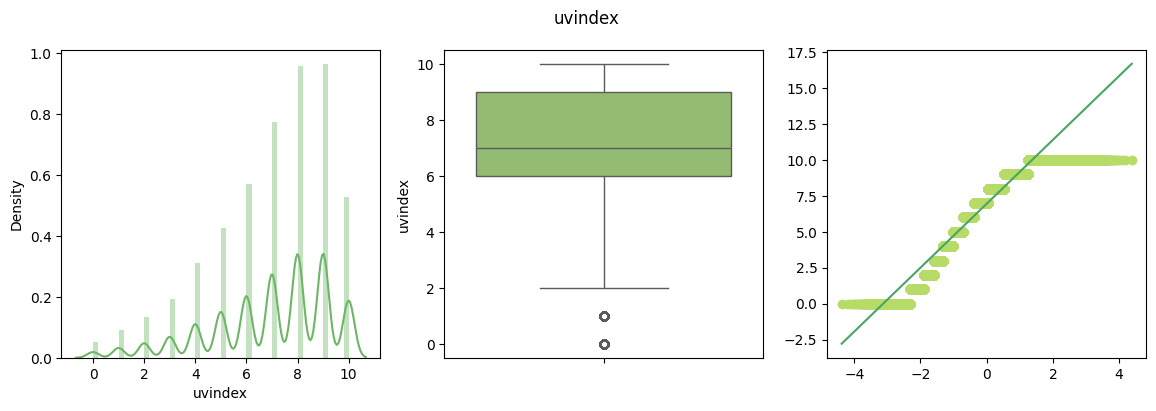

Skewness of severerisk: 2.226217041498343
Kurtosis of severerisk: 5.015327204282594


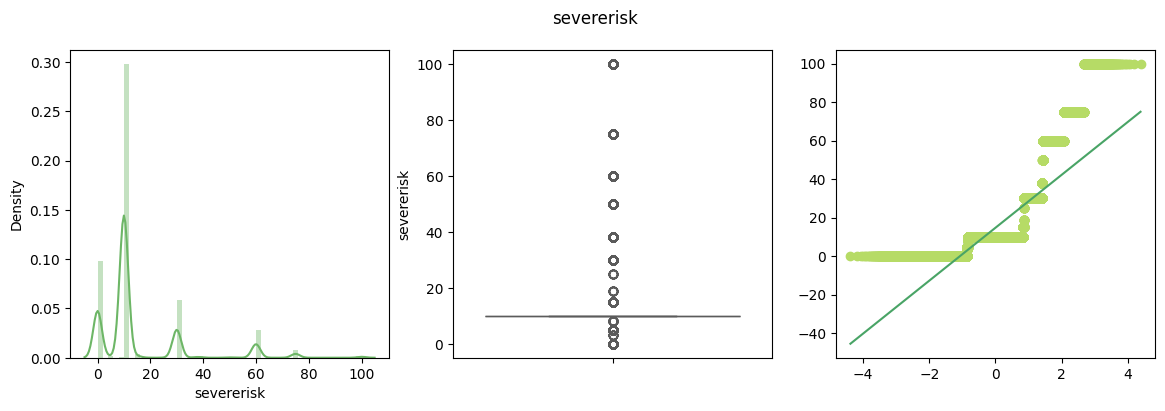

Skewness of moonphase: -0.009333109743887036
Kurtosis of moonphase: -1.1917226785956054


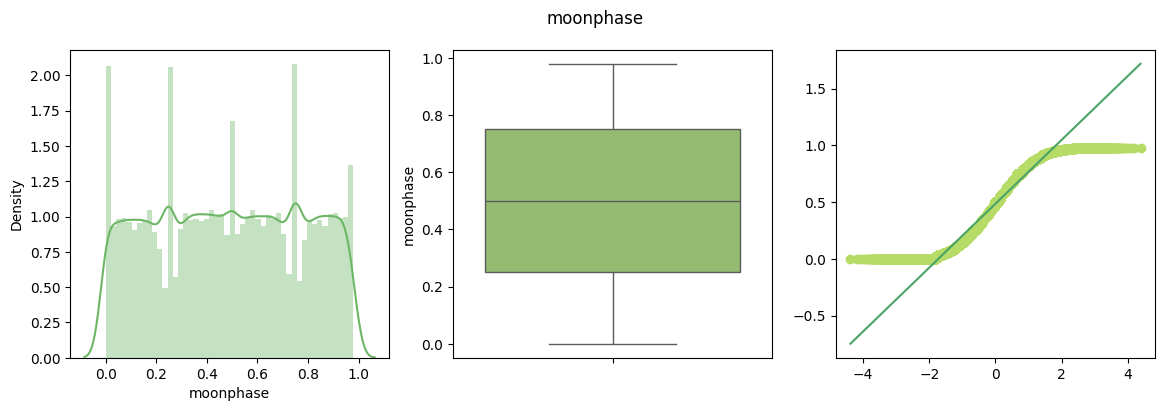

In [14]:
for col in df.select_dtypes(np.number).columns:
    plt.figure(figsize=(14,4))
    print(f"Skewness of {col}:", df[col].skew())
    print(f"Kurtosis of {col}:", df[col].kurtosis())

    # Biểu đồ phân phối với bảng màu 'summer'
    plt.subplot(131)
    sns.distplot(df[col], color=sns.color_palette("summer")[2])

    # Biểu đồ boxplot với bảng màu 'summer'
    plt.subplot(132)
    sns.boxplot(df[col], color=sns.color_palette("summer")[3])

    # Biểu đồ Q-Q plot với bảng màu 'summer'
    plt.subplot(133)
    osm, osr = probplot(df[col], dist='norm')[0]  # Tính toán các giá trị osm và osr
    slope, intercept, r = probplot(df[col], dist='norm')[1]
    plt.scatter(osm, osr, color=sns.color_palette("summer")[4])  # Màu cho các điểm
    plt.plot(osm, slope*osm + intercept, color=sns.color_palette("summer")[1])  # Màu cho đường

    plt.suptitle(col)
    plt.show()

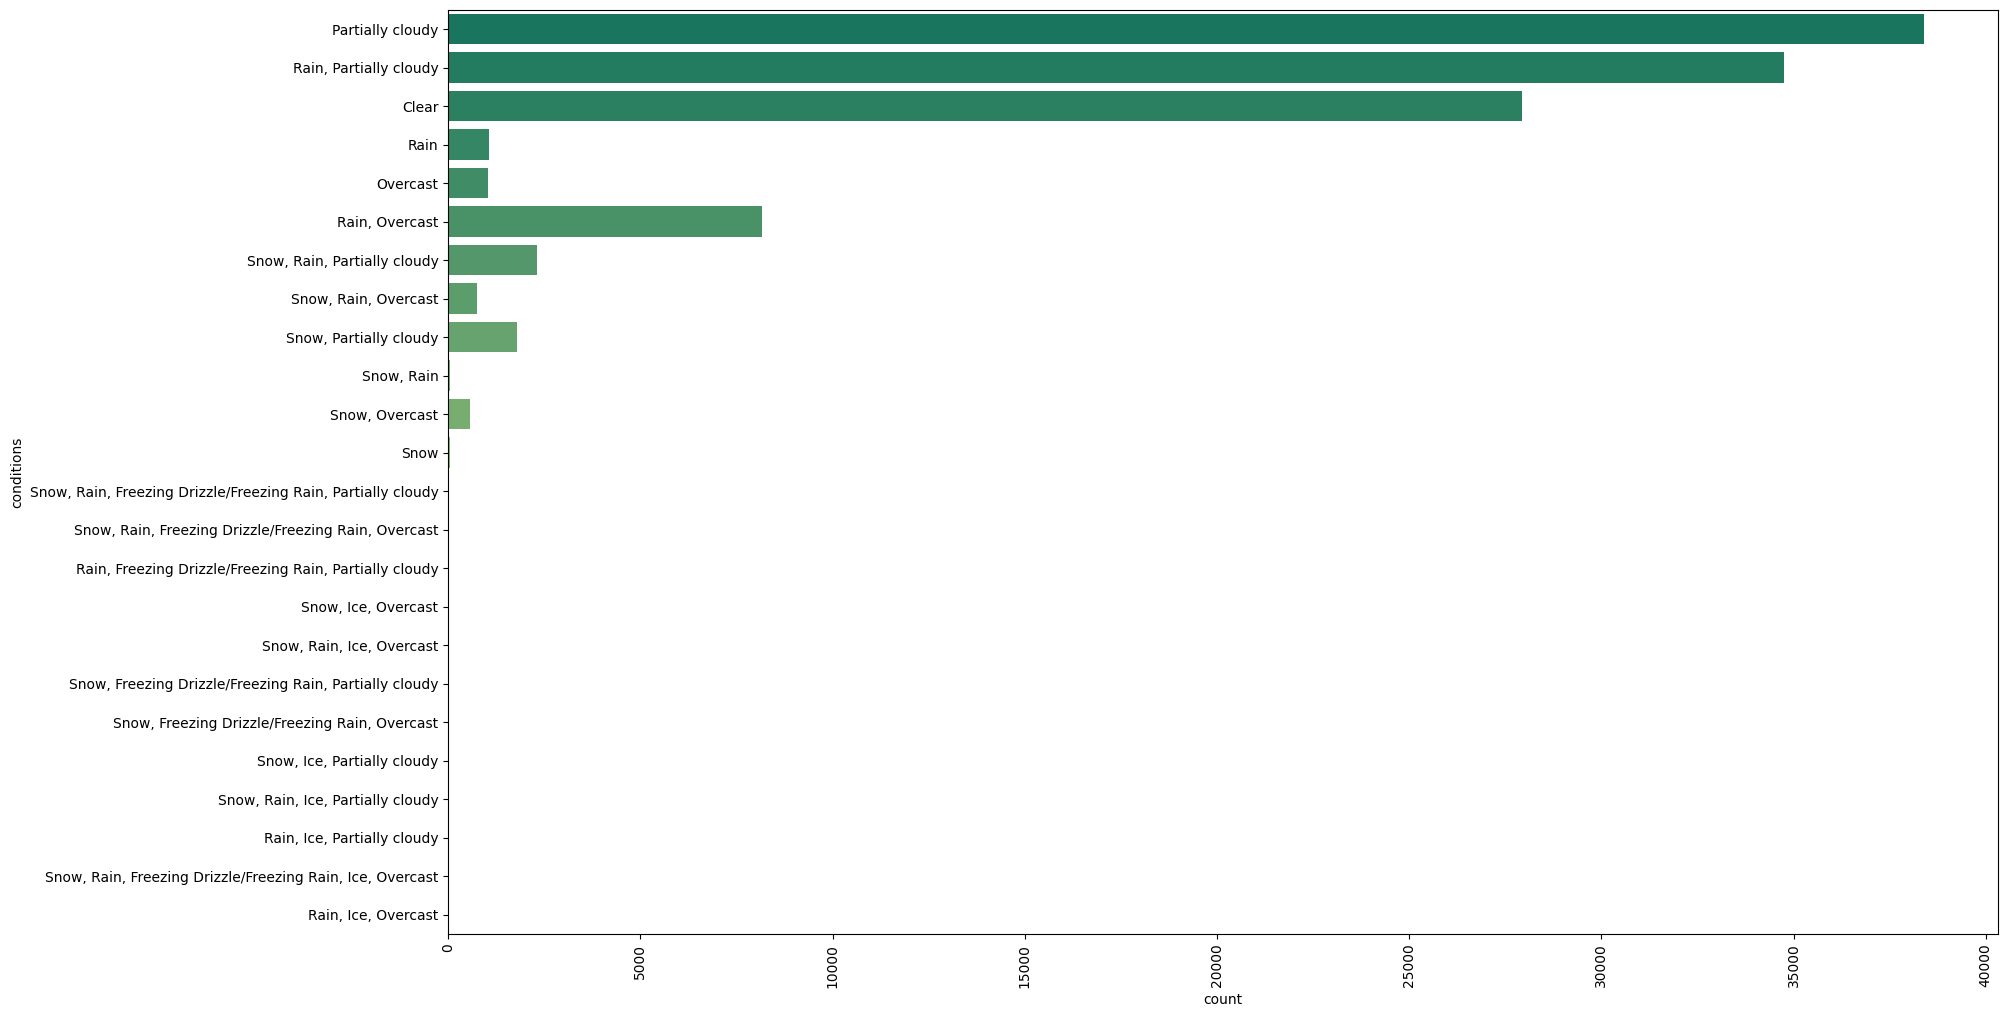

100874

In [15]:
plt.figure(figsize=(20,12))
fig = sns.countplot(df['conditions'], palette="summer")
plt.xticks(rotation=90)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

In [16]:
df.conditions.nunique()

24

In [17]:
df.conditions.value_counts()

conditions
Partially cloudy                                                38402
Rain, Partially cloudy                                          34749
Clear                                                           27928
Rain, Overcast                                                   8167
Snow, Rain, Partially cloudy                                     2311
Snow, Partially cloudy                                           1798
Rain                                                             1069
Overcast                                                         1049
Snow, Rain, Overcast                                              756
Snow, Overcast                                                    572
Snow, Rain                                                         53
Snow                                                               53
Snow, Rain, Freezing Drizzle/Freezing Rain, Partially cloudy       13
Snow, Rain, Freezing Drizzle/Freezing Rain, Overcast                8
Snow, Ice, Partially cloudy                                         6
Snow, Freezing Drizzle/Freezing Rain, Overcast                      5
Snow, Rain, Ice, Overcast                                           4
Snow, Ice, Overcast                                                 4
Snow, Rain, Ice, Partially cloudy                                   3
Snow, Freezing Drizzle/Freezing Rain, Partially cloudy              3
Rain, Ice, Partially cloudy                                         3
Rain, Freezing Drizzle/Freezing Rain, Partially cloudy              2
Snow, Rain, Freezing Drizzle/Freezing Rain, Ice, Overcast           1
Rain, Ice, Overcast                                                 1
Name: count, dtype: int64

In [18]:
# Các thành phần cơ bản cần dự đoán
labels = ['Partially cloudy', 'Rain', 'Clear', 'Overcast',
          'Snow', 'Freezing Drizzle/Freezing Rain', 'Ice']

# Với mỗi label, tạo cột mới trong dataframe
for label in labels:
    df[label] = df['conditions'].apply(lambda x: 1 if label in x else 0)

In [19]:
# Tính tổng số lượng 1 cho từng label
label_counts = df[labels].sum()

# In ra
print(label_counts)

Partially cloudy                  77290
Rain                              47148
Clear                             27928
Overcast                          10567
Snow                               5590
Freezing Drizzle/Freezing Rain       32
Ice                                  22
dtype: int64


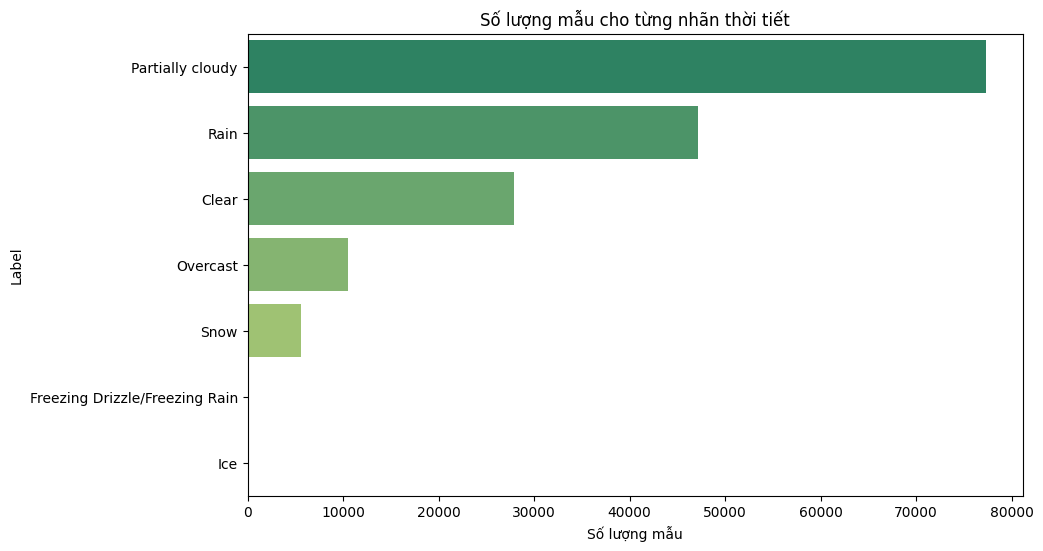

39462

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(y=label_counts.index, x=label_counts.values, palette="summer", orient='h')

plt.title('Số lượng mẫu cho từng nhãn thời tiết')
plt.xlabel('Số lượng mẫu')
plt.ylabel('Label')
plt.show()

plt.close('all')
gc.collect()

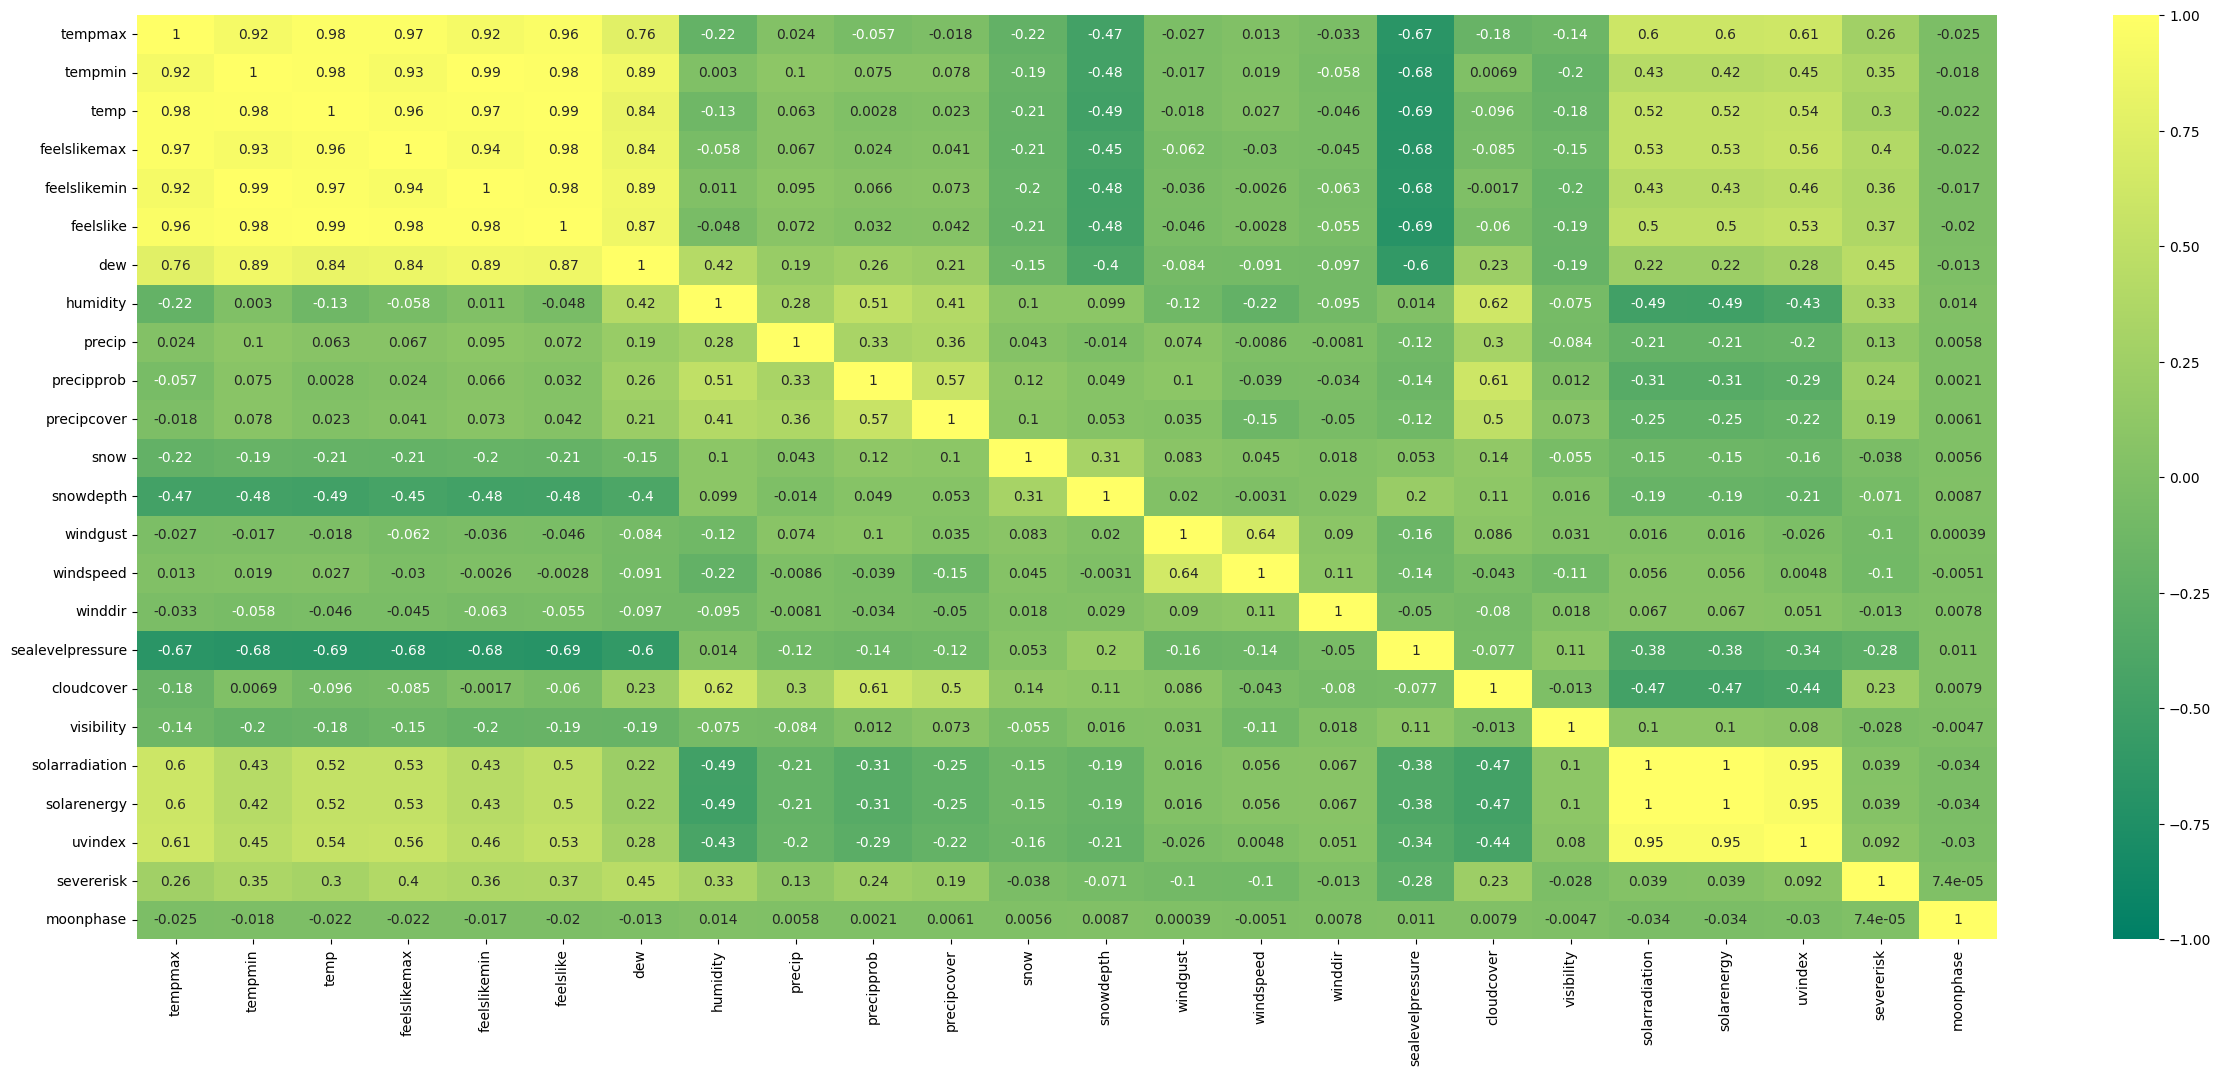

3946

In [21]:
selected_columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',	'humidity',
                    'precip',	'precipprob',	'precipcover', 'snow',	'snowdepth',	'windgust',	'windspeed',	'winddir',
                    'sealevelpressure',	'cloudcover',	'visibility',	'solarradiation',	'solarenergy',	'uvindex',	'severerisk',	'moonphase']

plt.figure(figsize=(30,12))
fig = sns.heatmap(df[selected_columns].corr(),annot=True,cmap='summer',vmin=-1.0,vmax=1.0)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

In [22]:
group1 = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike']
group2 = ['humidity', 'dew', 'precip', 'precipprob', 'precipcover']
group3 = ['windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover']
group4 = ['visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']

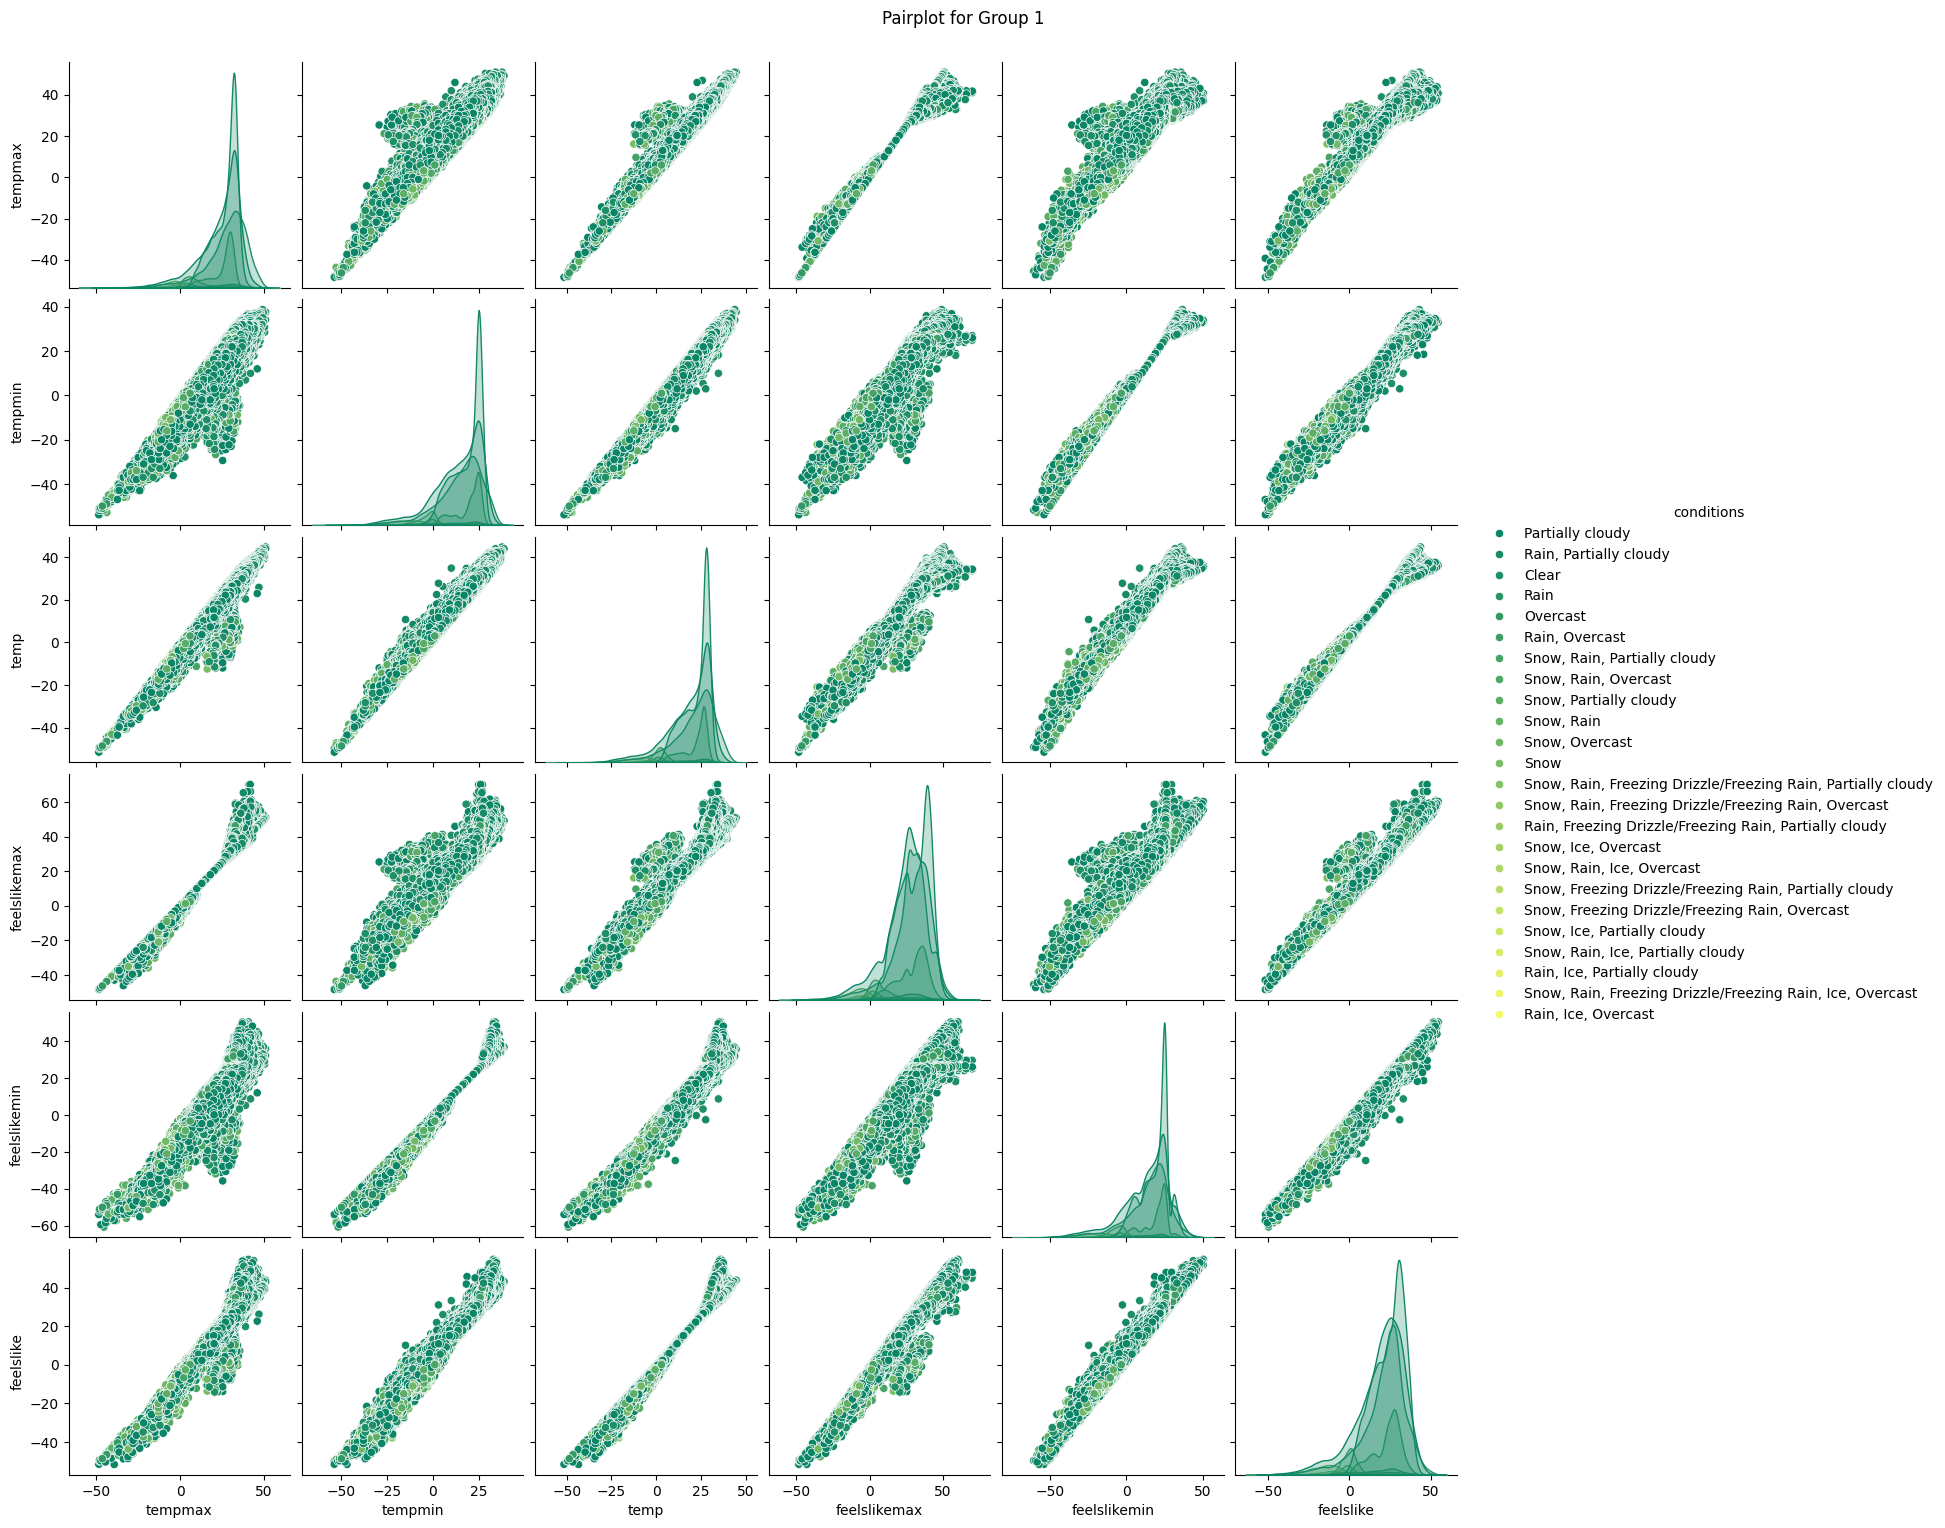

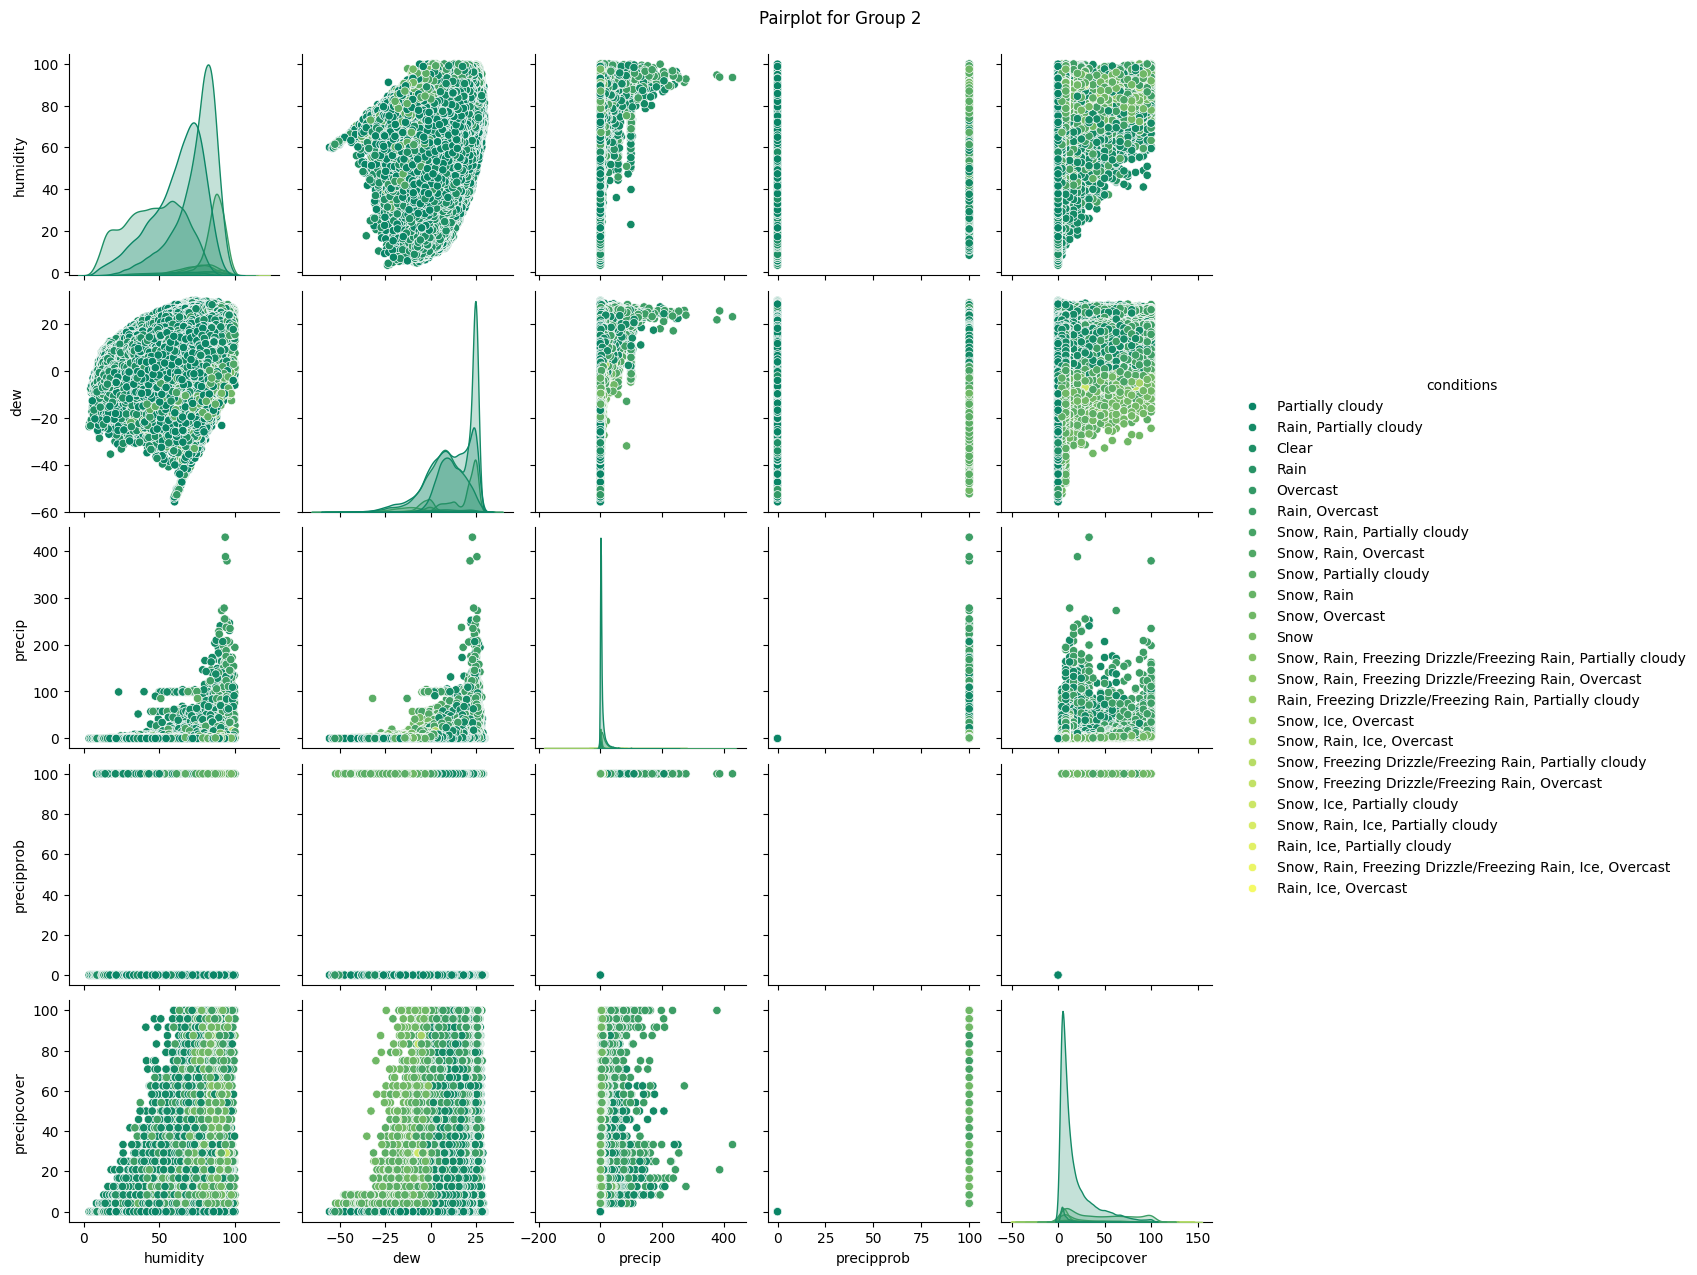

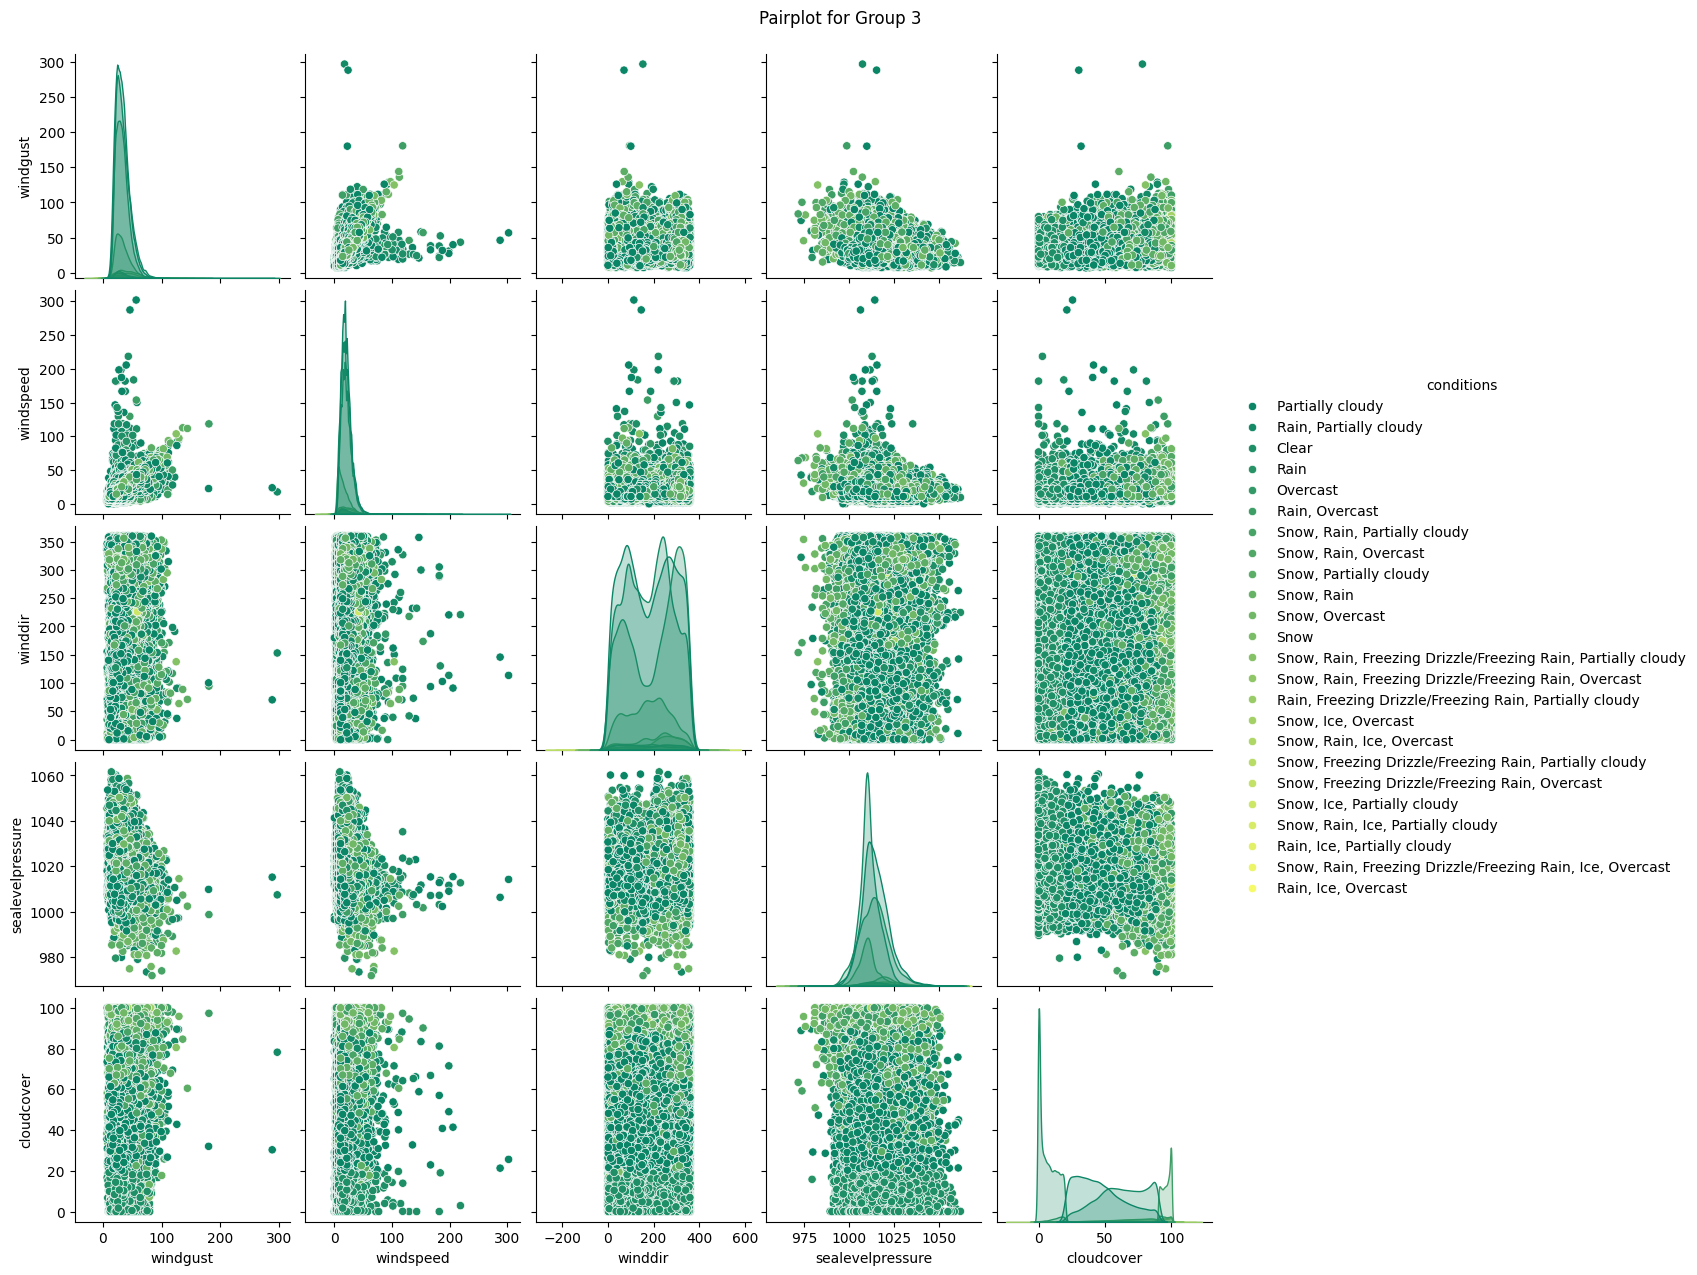

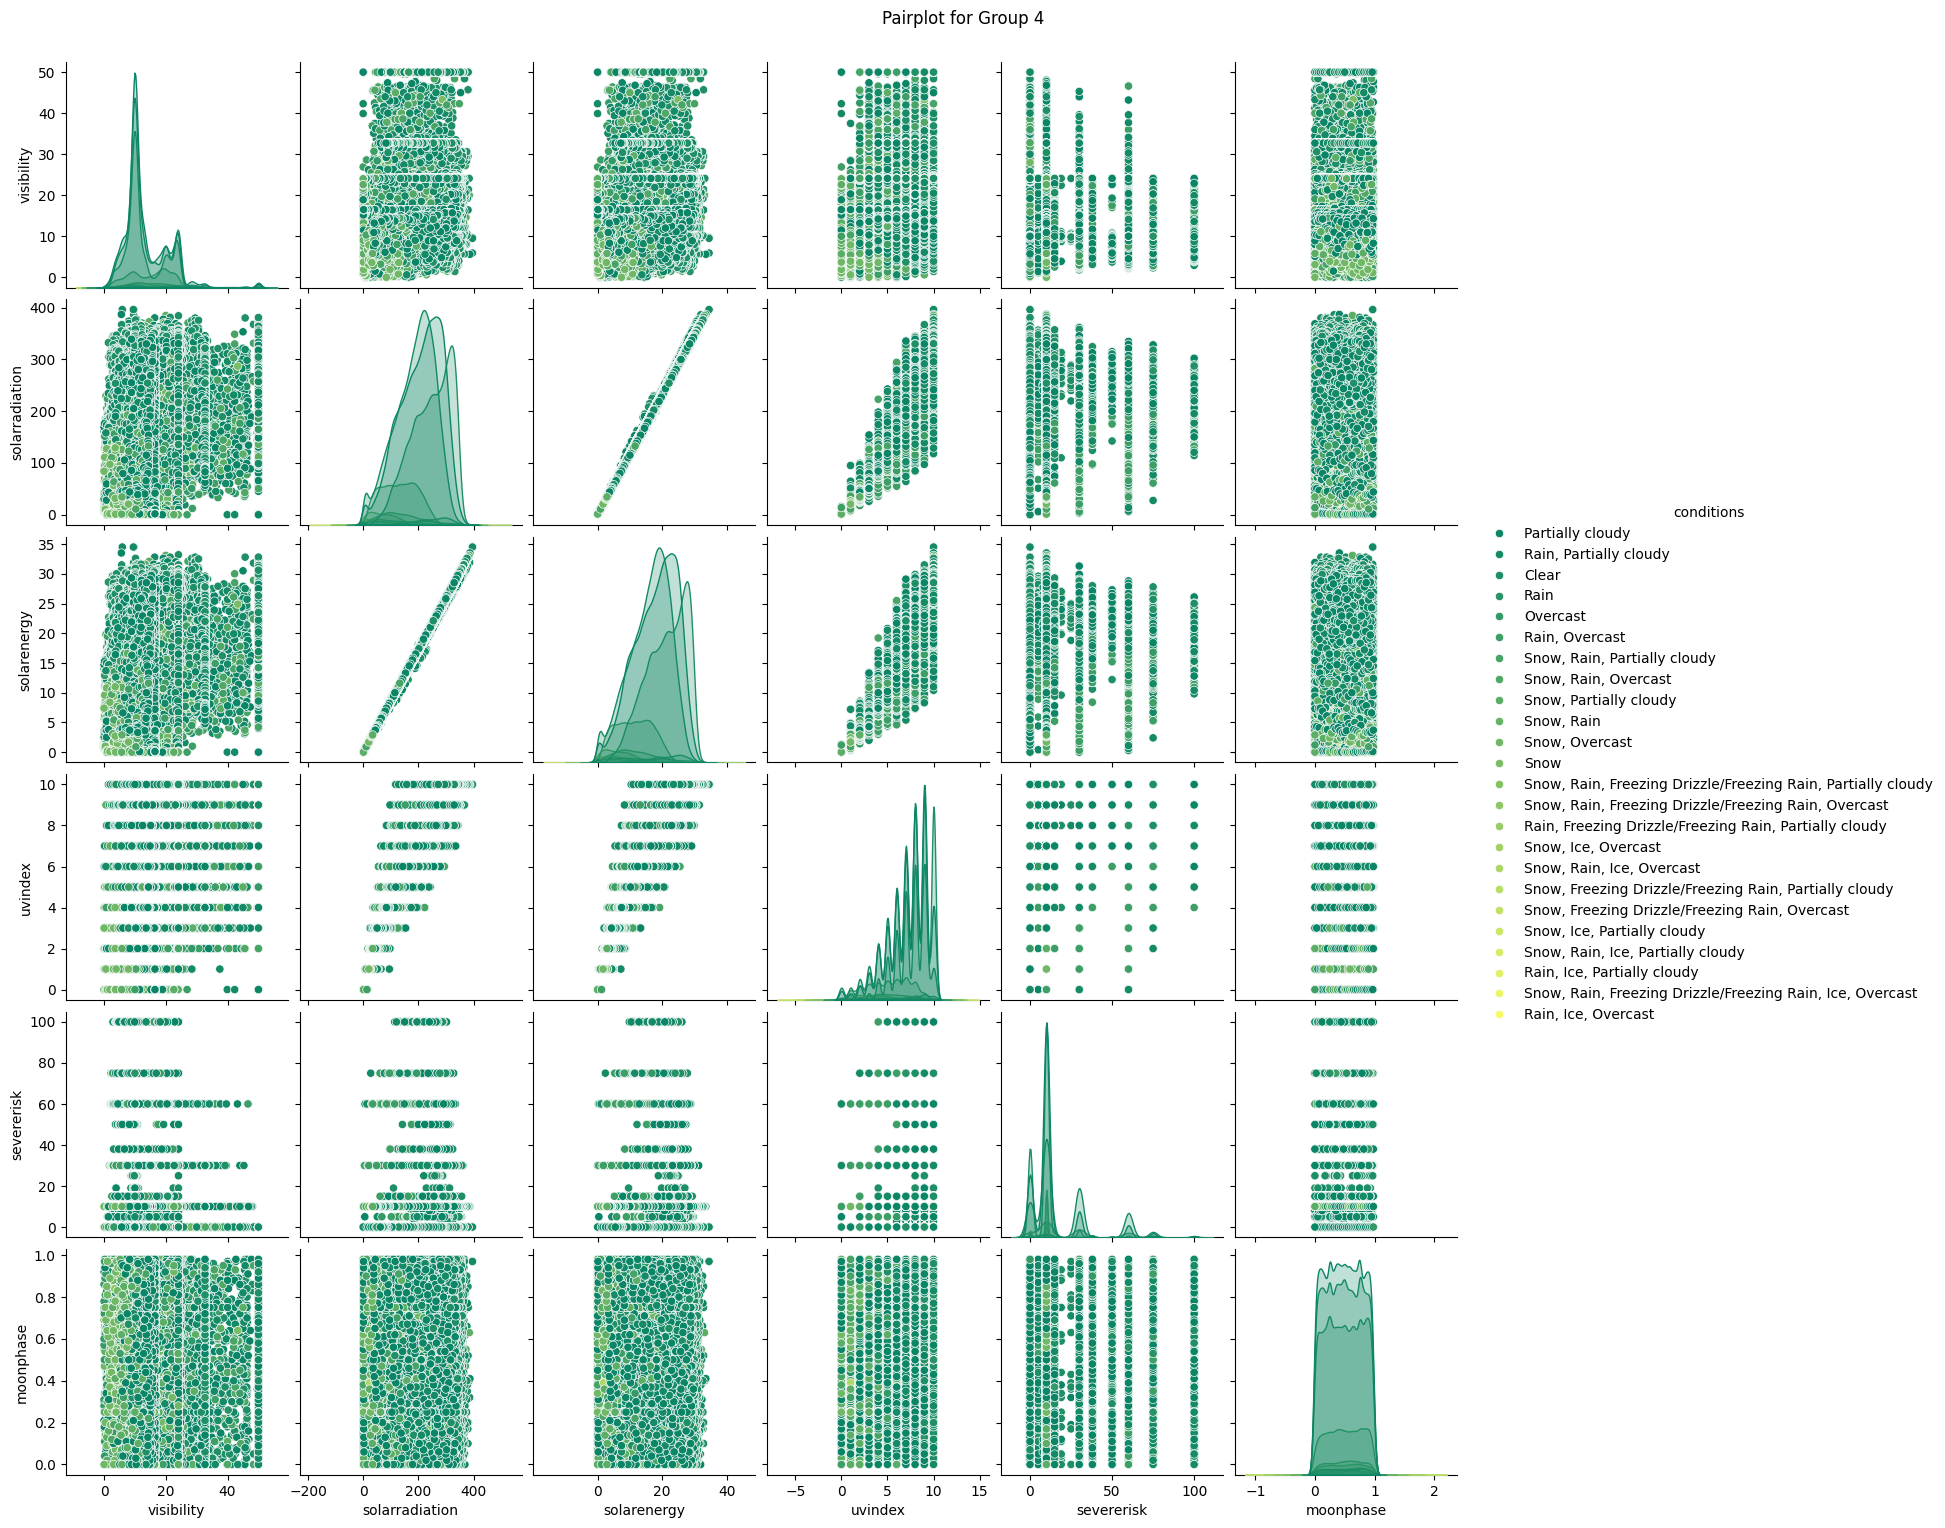

In [23]:
for i, group in enumerate([group1, group2, group3, group4], start=1):
    sns.pairplot(df[group + ['conditions']], hue='conditions', palette='summer')
    plt.suptitle(f"Pairplot for Group {i}", y=1.02)
    plt.show()

## Feature Engineering

### Feature Extraction

In [24]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

df.drop('datetime',axis=1,inplace=True)

In [25]:
df['sunrise'] = pd.to_datetime(df['sunrise'],errors='coerce')

df['hour_sunrise'] = df['sunrise'].dt.hour
df['minute_sunrise'] = df['sunrise'].dt.minute
df['second_sunrise'] = df['sunrise'].dt.second

df.drop('sunrise',axis=1,inplace=True)

In [26]:
df['sunset'] = pd.to_datetime(df['sunset'],errors='coerce')

df['hour_sunset'] = df['sunset'].dt.hour
df['minute_sunset'] = df['sunset'].dt.minute
df['second_sunset'] = df['sunset'].dt.second

df.drop('sunset',axis=1,inplace=True)

### Outlier Treatment

In [27]:
# skewed_cols = ['humidity']

# def remove_outliers(data,col):
#     lower_limit, upper_limit = data[col].quantile([0.25,0.75])
#     IQR = upper_limit - lower_limit
#     lower_whisker = lower_limit - 1.5 * IQR
#     upper_whisker = upper_limit + 1.5 * IQR
#     return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

In [28]:
# for col in skewed_cols:
#     df[col] = remove_outliers(df,col)

In [29]:
# fig = sns.boxplot(df['humidity'], palette='summer')
# plt.show(fig)
# plt.close('all')
# del fig
# gc.collect();

### Feature Splitting

In [30]:
df.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'Partially cloudy', 'Rain', 'Clear',
       'Overcast', 'Snow', 'Freezing Drizzle/Freezing Rain', 'Ice', 'year',
       'month', 'day', 'hour_sunrise', 'minute_sunrise', 'second_sunrise',
       'hour_sunset', 'minute_sunset', 'second_sunset'],
      dtype='object')

In [31]:
features = [
    'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
    'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
    'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
    'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
    'solarenergy', 'uvindex', 'severerisk', 'moonphase',
    'year', 'month', 'day', 'hour_sunrise', 'minute_sunrise',
    'second_sunrise', 'hour_sunset', 'minute_sunset', 'second_sunset'
]
target_columns = ['Partially cloudy', 'Rain', 'Clear', 'Overcast', 'Snow', 'Freezing Drizzle/Freezing Rain', 'Ice']


In [32]:
X = df[features]
y = df[target_columns]

### Balancing the target classes

In [33]:
def oversample_label(X, y, label_name, target_increase):
    mask = y[label_name] == 1
    X_label = X[mask]
    y_label = y[mask]

    repeats = target_increase // len(X_label) + 1
    X_oversampled = pd.concat([X_label] * repeats, ignore_index=True).iloc[:target_increase]
    y_oversampled = pd.concat([y_label] * repeats, ignore_index=True).iloc[:target_increase]

    X = pd.concat([X, X_oversampled], ignore_index=True)
    y = pd.concat([y, y_oversampled], ignore_index=True)
    return X, y

# Cân bằng dữ liệu cho 2 nhãn hiếm
X, y = oversample_label(X, y, "Freezing Drizzle/Freezing Rain", 5000)
X, y = oversample_label(X, y, "Ice", 5000)

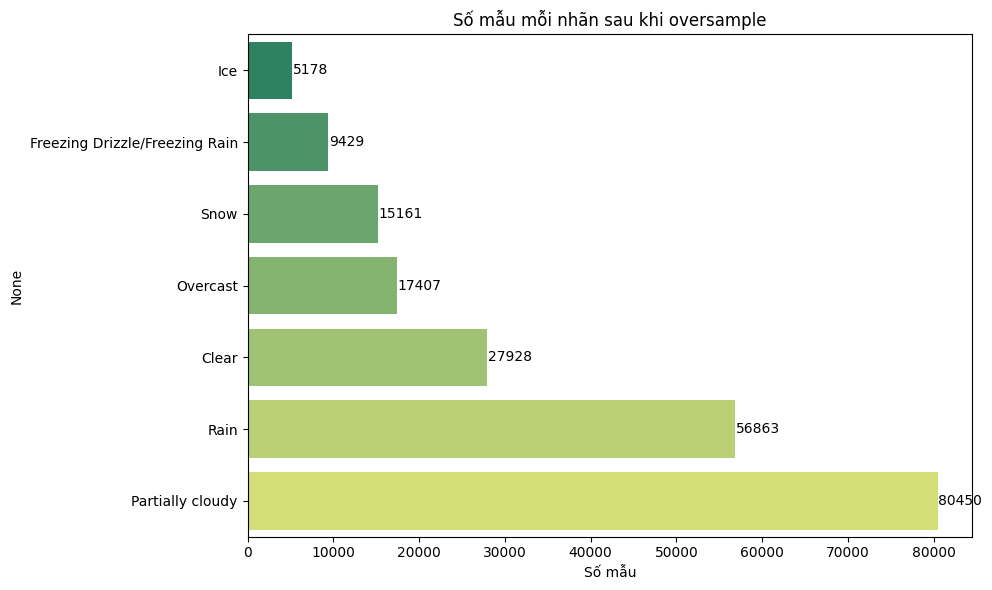

150620

In [34]:
label_counts = y.sum().sort_values(ascending=True)  # sort để cột thấp nằm trên

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=label_counts.values, y=label_counts.index, palette="summer")

# Thêm số trên mỗi cột
for i, v in enumerate(label_counts.values):
    ax.text(v + 100, i, str(v), color='black', va='center', fontsize=10)

plt.xlabel("Số mẫu")
plt.title("Số mẫu mỗi nhãn sau khi oversample")
plt.tight_layout()
plt.show()

plt.close("all")
gc.collect()

### Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [36]:
print("Shape of the training set:",X_train.shape)
print("Shape of the testing set:",X_test.shape)

Shape of the training set: (101568, 34)
Shape of the testing set: (25392, 34)


### Label Encoding

In [37]:
encoder = LabelEncoder()
X_train['preciptype'] = encoder.fit_transform(X_train['preciptype'])
X_test['preciptype'] = encoder.transform(X_test['preciptype'])

In [38]:
encoder.classes_

array(['freezingrain', 'freezingrain,snow', 'no precipitation', 'rain',
       'rain,freezingrain', 'rain,freezingrain,snow',
       'rain,freezingrain,snow,ice', 'rain,ice', 'rain,snow',
       'rain,snow,ice', 'snow', 'snow,ice'], dtype=object)

In [39]:
label_mapping = {label: idx for idx, label in enumerate(encoder.classes_)}
label_mapping

{'freezingrain': 0,
 'freezingrain,snow': 1,
 'no precipitation': 2,
 'rain': 3,
 'rain,freezingrain': 4,
 'rain,freezingrain,snow': 5,
 'rain,freezingrain,snow,ice': 6,
 'rain,ice': 7,
 'rain,snow': 8,
 'rain,snow,ice': 9,
 'snow': 10,
 'snow,ice': 11}

### Feature Selection

In [40]:
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('duplicate',DropDuplicateFeatures())
])

In [41]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [42]:
print("Shape of the training set:",X_train.shape)
print("Shape of the testing set:",X_test.shape)

Shape of the training set: (101568, 34)
Shape of the testing set: (25392, 34)


In [43]:
print("Tên cột còn lại trong X_train:", X_train.columns.tolist())
print("Tên cột còn lại trong X_test:", X_test.columns.tolist())

Tên cột còn lại trong X_train: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'year', 'month', 'day', 'hour_sunrise', 'minute_sunrise', 'second_sunrise', 'hour_sunset', 'minute_sunset', 'second_sunset']
Tên cột còn lại trong X_test: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'year', 'month', 'day', 'hour_sunrise', 'minute_sunrise', 'second_sunrise', 'hour_sunset', 'minute_sunset', 'second_sunset']


In [44]:
# Lưu điểm số đặc trưng theo từng nhãn
feature_scores = {}

for column in y_train.columns:
    selector = SelectKBest(score_func=f_classif, k='all')  # chọn tất cả để tính điểm
    selector.fit(X_train, y_train[column])
    feature_scores[column] = selector.scores_

# Tạo DataFrame chứa điểm số
score_df = pd.DataFrame(feature_scores, index=X_train.columns)

# Tính điểm trung bình của mỗi đặc trưng qua tất cả các nhãn
score_df['mean_score'] = score_df.mean(axis=1)

# Lấy top 10 đặc trưng có điểm trung bình cao nhất
top_10_features = score_df['mean_score'].sort_values(ascending=False).head(10).index.tolist()

print("Top 10 đặc trưng được chọn:", top_10_features)

Top 10 đặc trưng được chọn: ['precipprob', 'cloudcover', 'preciptype', 'snow', 'precipcover', 'humidity', 'tempmax', 'feelslike', 'feelslikemax', 'temp']


In [45]:
sfm = SelectFromModel(estimator=RandomForestClassifier(),max_features=10)
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=10)

In [46]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'cloudcover'], dtype=object)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
def plot_feature_importances(feat_imp_type, figsize=(10, 8)):
    feat_imps = xgb.get_booster().get_score(importance_type=feat_imp_type)
    keys = list(feat_imps.keys())
    values = list(feat_imps.values())

    feat_imps_df = pd.DataFrame(data=values, index=keys, columns=["Importance"])\
        .sort_values(by="Importance", ascending=False).reset_index()
    feat_imps_df.rename({'index': 'Feature'}, axis=1, inplace=True)

    plt.figure(figsize=figsize)
    fig = sns.barplot(
        x='Importance',
        y='Feature',
        data=feat_imps_df,
        orient='h',
        palette='summer'
    )
    plt.title(f"{feat_imp_type.title()} Feature Importance", fontsize=16)
    plt.tight_layout()
    plt.show()
    plt.close('all')
    del fig
    gc.collect()


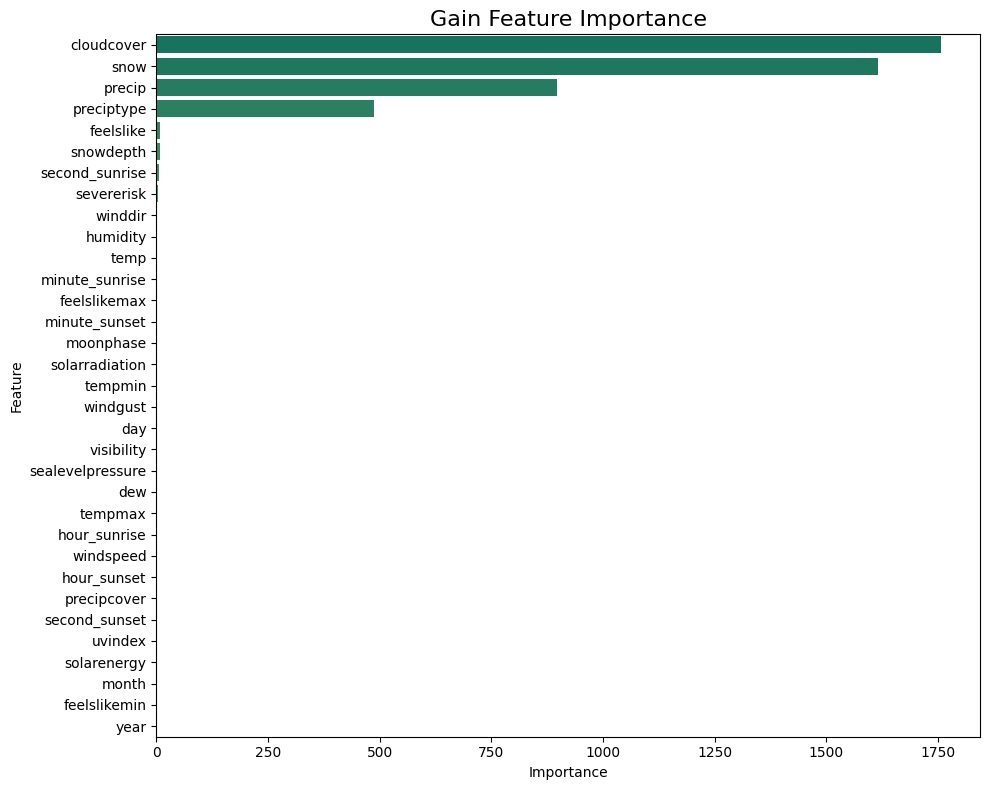

In [49]:
plot_feature_importances('gain', figsize=(10, 8))

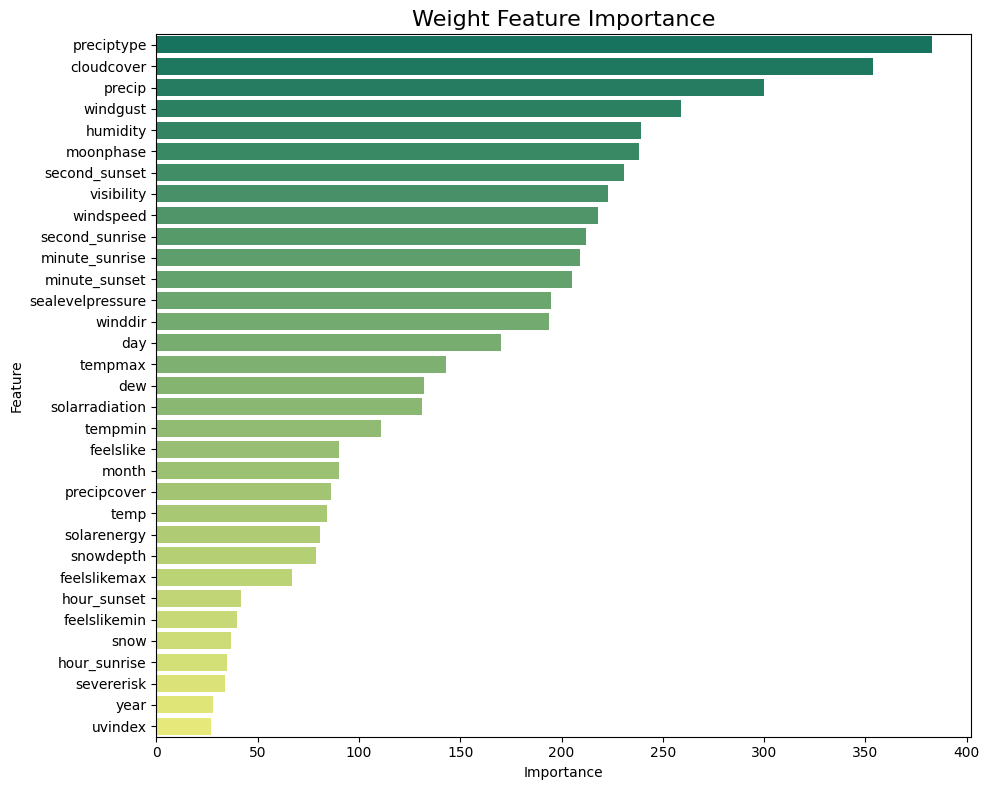

In [50]:
plot_feature_importances('weight', figsize=(10, 8))

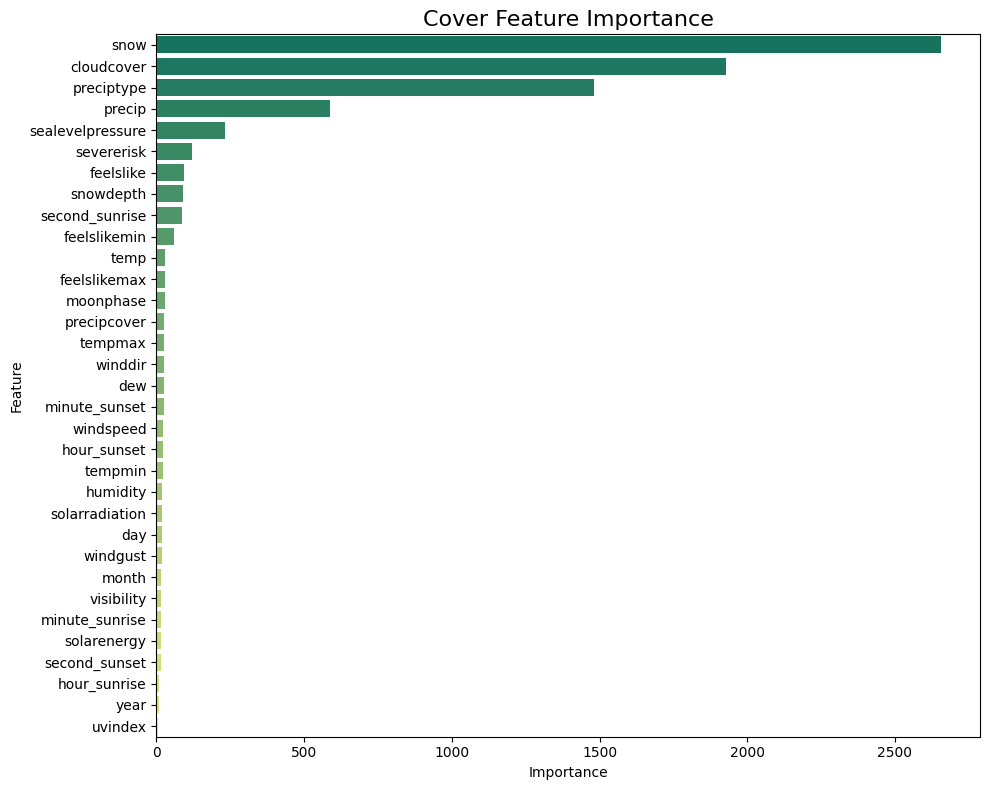

In [51]:
plot_feature_importances('cover', figsize=(10, 8))

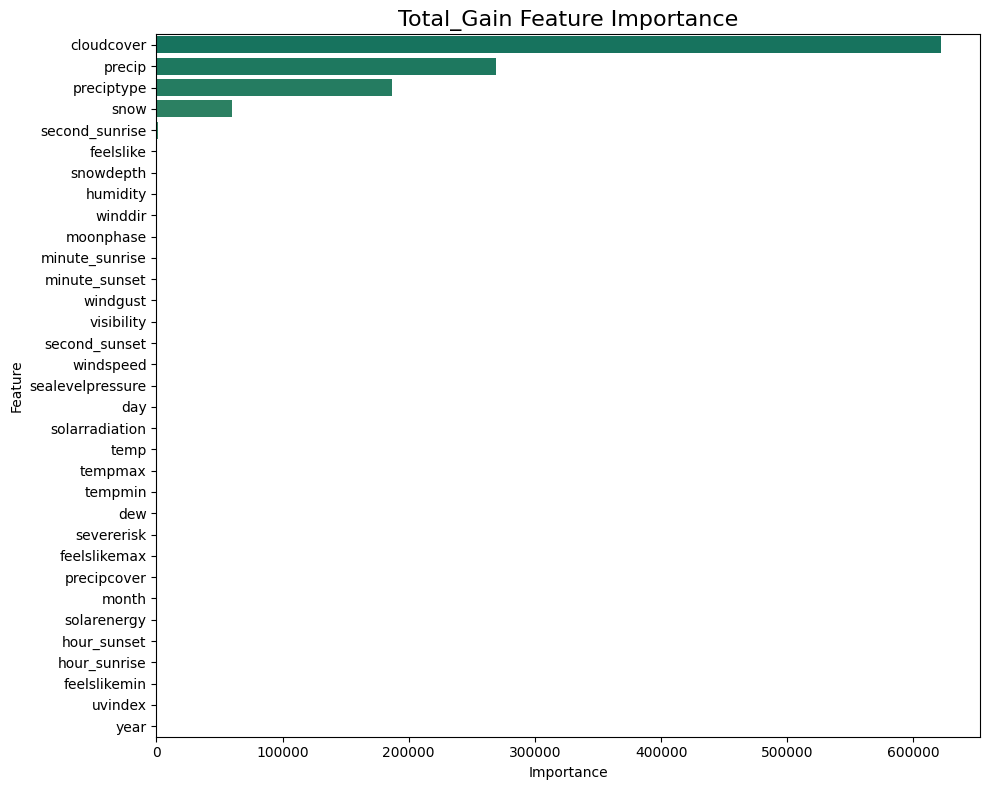

In [52]:
plot_feature_importances('total_gain', figsize=(10, 8))

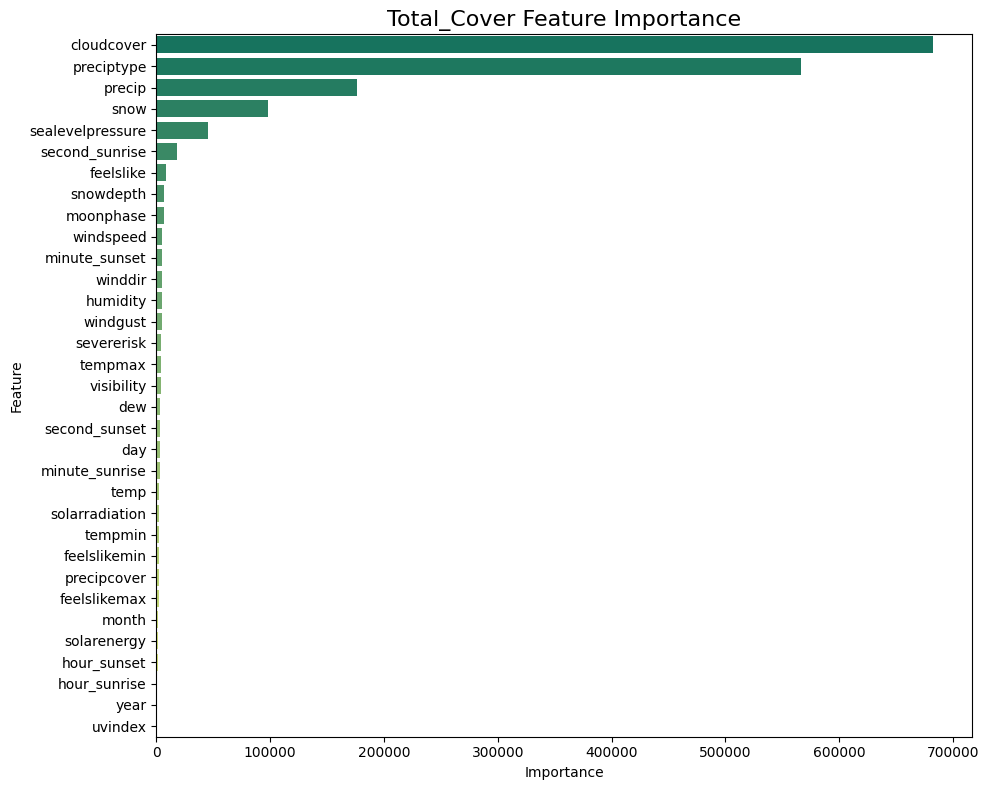

In [53]:
plot_feature_importances('total_cover', figsize=(10, 8))

In [54]:
final_selected_features = [
    'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin','feelslike', 'dew', 'humidity',
    'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth',
    'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
    'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'year', 'month', 'day',
    'hour_sunrise', 'minute_sunrise', 'second_sunrise', 'hour_sunset', 'minute_sunset', 'second_sunset'
    ]

final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [55]:
gc.collect()

9789

### Feature Scaling

In [56]:
scaler = StandardScaler()
features = final_X_train.columns
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=features)

final_X_train.head()

tempmax   tempmin      temp  feelslikemax  feelslikemin  feelslike  \
0  0.470832  0.518624  0.450696      0.432068      0.497378   0.394584   
1 -1.485019 -1.229966 -1.502169     -1.511342     -1.274267  -1.536972   
2  0.796807  1.043202  0.907914      1.299428      1.183808   1.202683   
3 -0.530378 -0.614158 -0.541235     -0.526594     -0.522462  -0.479215   
4 -0.359629 -0.234030 -0.177010     -0.383121     -0.149828  -0.163859   

        dew  humidity    precip  precipprob  ...  moonphase      year  \
0  0.845608  0.852653  0.032987    1.064560  ...   1.090676  0.953750   
1 -1.073477  1.004883  0.295190    1.064560  ...  -0.781359  0.953750   
2  1.317384  0.877206  0.101702    1.064560  ...   0.085323  0.953750   
3 -0.401797  0.057130 -0.301547   -0.939355  ...  -0.192015 -1.048492   
4  0.365837  1.338806 -0.251186    1.064560  ...  -0.642690 -1.048492   

      month       day  hour_sunrise  minute_sunrise  second_sunrise  \
0  0.481362  1.418107      0.133689       -0.981599        0.598022   
1 -1.218129  0.142114      1.066217        1.331100        1.505184   
2  0.481362  0.490112     -0.798838        0.315769        1.561881   
3  1.331108  1.070109      0.133689        0.090140        0.257837   
4 -0.651632  1.534106     -0.798838        0.767027        0.257837   

   hour_sunset  minute_sunset  second_sunset  
0     0.082412      -0.448098       0.726010  
1     0.082412       0.906597       0.431439  
2     0.082412      -0.506998       0.784925  
3    -1.688924       1.672294      -1.041417  
4     0.968081      -0.860397      -0.157703  

[5 rows x 34 columns]

In [57]:
random_r = df.sample(1)
with pd.option_context('display.max_columns', None):
    print(random_r)

         name  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
84243  Aomori     30.0     19.9  24.4          32.3          19.9       24.7   

        dew  humidity  precip  precipprob  precipcover preciptype  snow  \
84243  19.9      77.1     2.0         100         4.17       rain   0.0   

       snowdepth  windgust  windspeed  winddir  sealevelpressure  cloudcover  \
84243        0.0      64.1       35.9    206.2            1007.7        75.6   

       visibility  solarradiation  solarenergy  uvindex  severerisk  \
84243        11.6           198.7         17.3      5.0        10.0   

       moonphase              conditions  \
84243       0.32  Rain, Partially cloudy   

                                             description  icon  \
84243  Partly cloudy throughout the day with early mo...  rain   

                                                stations  Partially cloudy  \
84243  RJSA,47575099999,47580044402,RJSR,RJSM,4754209...                 1   

     

## Model Training & Evaluation

In [58]:
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
hamming_losses = []

In [59]:
def train_and_evaluate_model(model):
    model.fit(final_X_train, y_train)
    y_pred = model.predict(final_X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    acc = accuracy_score(y_test, y_pred)  # subset accuracy
    hamming = hamming_loss(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracy_scores.append(acc)
    hamming_losses.append(hamming)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    models.append(model)
    gc.collect()

In [60]:
lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
train_and_evaluate_model(lr)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       0.98      1.00      0.99      2988
           5       0.87      0.87      0.87      1843
           6       0.96      0.94      0.95      1006

   micro avg       0.92      0.95      0.94     42400
   macro avg       0.95      0.96      0.95     42400
weighted avg       0.92      0.95      0.94     42400
 samples avg       0.92      0.95      0.92     42400



In [61]:
kn = OneVsRestClassifier(KNeighborsClassifier())
train_and_evaluate_model(kn)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     16243
           1       0.99      0.99      0.99     11407
           2       0.81      0.83      0.82      5484
           3       0.86      0.72      0.78      3429
           4       0.98      1.00      0.99      2988
           5       1.00      1.00      1.00      1843
           6       0.99      1.00      1.00      1006

   micro avg       0.91      0.92      0.91     42400
   macro avg       0.93      0.92      0.92     42400
weighted avg       0.91      0.92      0.91     42400
 samples avg       0.88      0.89      0.88     42400



In [62]:
svc = OneVsRestClassifier(SVC())
train_and_evaluate_model(svc)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16243
           1       1.00      1.00      1.00     11407
           2       0.98      0.98      0.98      5484
           3       0.96      0.95      0.96      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       0.98      0.99      0.99     42400
   macro avg       0.99      0.99      0.99     42400
weighted avg       0.98      0.99      0.99     42400
 samples avg       0.98      0.99      0.98     42400



In [63]:
lsvc = OneVsRestClassifier(LinearSVC())
train_and_evaluate_model(lsvc)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       0.98      1.00      0.99      2988
           5       0.89      0.87      0.88      1843
           6       0.96      0.94      0.95      1006

   micro avg       0.92      0.96      0.94     42400
   macro avg       0.95      0.96      0.95     42400
weighted avg       0.92      0.96      0.94     42400
 samples avg       0.92      0.95      0.92     42400



In [64]:
gnb = OneVsRestClassifier(GaussianNB())
train_and_evaluate_model(gnb)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     16243
           1       0.95      1.00      0.98     11407
           2       0.48      1.00      0.65      5484
           3       0.74      0.80      0.77      3429
           4       0.82      1.00      0.90      2988
           5       0.59      0.99      0.74      1843
           6       0.79      0.92      0.85      1006

   micro avg       0.76      0.92      0.83     42400
   macro avg       0.74      0.93      0.82     42400
weighted avg       0.80      0.92      0.84     42400
 samples avg       0.75      0.91      0.81     42400



In [65]:
bnb = OneVsRestClassifier(BernoulliNB())
train_and_evaluate_model(bnb)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     16243
           1       0.95      0.91      0.93     11407
           2       0.56      0.83      0.67      5484
           3       0.47      0.73      0.57      3429
           4       0.70      0.98      0.81      2988
           5       0.49      0.97      0.65      1843
           6       0.67      0.95      0.78      1006

   micro avg       0.69      0.82      0.75     42400
   macro avg       0.65      0.87      0.73     42400
weighted avg       0.72      0.82      0.76     42400
 samples avg       0.63      0.78      0.68     42400



In [66]:
dtc = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
train_and_evaluate_model(dtc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [67]:
rfc = OneVsRestClassifier(RandomForestClassifier(random_state=42))
train_and_evaluate_model(rfc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       0.99      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [68]:
gbc = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
train_and_evaluate_model(gbc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [69]:
abc = OneVsRestClassifier(AdaBoostClassifier(random_state=42))
train_and_evaluate_model(abc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [70]:
bagging = OneVsRestClassifier(BaggingClassifier(random_state=42))
train_and_evaluate_model(bagging)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [71]:
# train_and_evaluate_model(HistGradientBoostingClassifier())

In [72]:
etc = OneVsRestClassifier(ExtraTreesClassifier(random_state=42))
train_and_evaluate_model(etc)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     16243
           1       1.00      1.00      1.00     11407
           2       0.98      0.99      0.99      5484
           3       0.96      0.81      0.88      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       0.98      0.98      0.98     42400
   macro avg       0.99      0.97      0.98     42400
weighted avg       0.98      0.98      0.98     42400
 samples avg       0.97      0.97      0.97     42400



In [73]:
xgb = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
train_and_evaluate_model(xgb)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [74]:
cbc = OneVsRestClassifier(CatBoostClassifier(silent=True, random_state=42))
train_and_evaluate_model(cbc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      0.99      0.99      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [75]:
voting_clf = OneVsRestClassifier(
    VotingClassifier(
        estimators=[
            ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
            ('ET', ExtraTreesClassifier()),
            ('LGBM', LGBMClassifier()),
            ('BAG', BaggingClassifier()),
            ('RF', RandomForestClassifier()),
            ('DT', DecisionTreeClassifier())
        ],
        voting='soft',
        n_jobs=-1,
        verbose=2
    )
)

train_and_evaluate_model(voting_clf)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



In [76]:
stacking_clf = OneVsRestClassifier(
    StackingClassifier(
        estimators=[
            ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
            ('ET', ExtraTreesClassifier()),
            ('LGBM', LGBMClassifier()),
            ('BAG', BaggingClassifier()),
            ('RF', RandomForestClassifier()),
            ('DT', DecisionTreeClassifier())
        ],
        final_estimator=GradientBoostingClassifier(),
        n_jobs=-1,
        verbose=3,
        stack_method='predict_proba'
    )
)

train_and_evaluate_model(stacking_clf)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16243
           1       1.00      1.00      1.00     11407
           2       1.00      1.00      1.00      5484
           3       1.00      1.00      1.00      3429
           4       1.00      1.00      1.00      2988
           5       1.00      1.00      1.00      1843
           6       1.00      1.00      1.00      1006

   micro avg       1.00      1.00      1.00     42400
   macro avg       1.00      1.00      1.00     42400
weighted avg       1.00      1.00      1.00     42400
 samples avg       1.00      1.00      1.00     42400



## Baseline Models Performance Comparison

In [77]:
model_perfs = pd.DataFrame({'Model': models,
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores}).sort_values('Accuracy',ascending=False)
model_perfs

Model  Accuracy  Precision  \
15  OneVsRestClassifier(estimator=StackingClassifi...  1.000000   1.000000   
14  OneVsRestClassifier(estimator=VotingClassifier...  1.000000   1.000000   
8   OneVsRestClassifier(estimator=GradientBoosting...  1.000000   1.000000   
9   OneVsRestClassifier(estimator=AdaBoostClassifi...  0.999961   0.999858   
10  OneVsRestClassifier(estimator=BaggingClassifie...  0.999921   0.999781   
6   OneVsRestClassifier(estimator=DecisionTreeClas...  0.999803   0.999357   
7   OneVsRestClassifier(estimator=RandomForestClas...  0.998385   0.998885   
13  OneVsRestClassifier(estimator=<catboost.core.C...  0.997598   0.999088   
12  OneVsRestClassifier(estimator=XGBClassifier(ba...  0.997204   0.998912   
2                OneVsRestClassifier(estimator=SVC())  0.966525   0.988014   
11  OneVsRestClassifier(estimator=ExtraTreesClassi...  0.953017   0.985430   
1   OneVsRestClassifier(estimator=KNeighborsClassi...  0.850504   0.929519   
0   OneVsRestClassifier(estimator=LogisticRegressi...  0.797889   0.948400   
3          OneVsRestClassifier(estimator=LinearSVC())  0.795959   0.949728   
4         OneVsRestClassifier(estimator=GaussianNB())  0.530167   0.743146   
5        OneVsRestClassifier(estimator=BernoulliNB())  0.376063   0.647693   

      Recall        F1  
15  1.000000  1.000000  
14  1.000000  1.000000  
8   1.000000  1.000000  
9   1.000000  0.999929  
10  1.000000  0.999890  
6   1.000000  0.999678  
7   0.999599  0.999240  
13  0.998303  0.998693  
12  0.999081  0.998996  
2   0.987883  0.987926  
11  0.968297  0.975834  
1   0.920034  0.923802  
0   0.958275  0.953053  
3   0.958252  0.953652  
4   0.933523  0.816152  
5   0.868233  0.732111

## Hyperparameter Tuning and Cross Validation


In [78]:
param_grid = {
    'estimator__alpha': np.linspace(0, 1, 6),
    'estimator__binarize': np.linspace(0, 1, 5),
    'estimator__fit_prior': [True, False]
}

bnb_model = OneVsRestClassifier(BernoulliNB())
grid_bnb = GridSearchCV(bnb_model, param_grid, verbose=3, cv=5, n_jobs=-1)
grid_bnb.fit(final_X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=BernoulliNB()),
             n_jobs=-1,
             param_grid={'estimator__alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'estimator__binarize': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'estimator__fit_prior': [True, False]},
             verbose=3)

In [79]:
grid_bnb.best_score_

np.float64(0.5496416238956714)

In [80]:
grid_bnb.best_params_

{'estimator__alpha': np.float64(0.4),
 'estimator__binarize': np.float64(1.0),
 'estimator__fit_prior': True}

In [81]:
param_grid = {
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__splitter': ['best', 'random'],
    'estimator__max_features': ['sqrt', 'log2']
}

base_model = OneVsRestClassifier(DecisionTreeClassifier())
grid_dt = GridSearchCV(base_model, param_grid, verbose=4, cv=5, n_jobs=-1)

grid_dt.fit(final_X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'estimator__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                         'estimator__max_features': ['sqrt', 'log2'],
                         'estimator__splitter': ['best', 'random']},
             verbose=4)

In [82]:
grid_dt.best_score_

np.float64(0.9664755069913751)

In [83]:
grid_dt.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_features': 'log2',
 'estimator__splitter': 'best'}

In [84]:
param_distributions = {
    'estimator__n_estimators': [200, 400, 600, 800, 1000],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__bootstrap': [True, False],
    'estimator__oob_score': [True, False],
    'estimator__class_weight': ['balanced', 'balanced_subsample']
}
base_model = OneVsRestClassifier(RandomForestClassifier())
grid_rf = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
grid_rf.fit(final_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'estimator__bootstrap': [True, False],
                                        'estimator__class_weight': ['balanced',
                                                                    'balanced_subsample'],
                                        'estimator__criterion': ['gini',
                                                                 'entropy',
                                                                 'log_loss'],
                                        'estimator__max_features': ['sqrt',
                                                                    'log2'],
                                        'estimator__n_estimators': [200, 400,
                                                                    600, 800,
                                                                    1000],
                                        'estimator__oob_score': [True, False]},
                   random_state=42, verbose=2)

In [85]:
grid_rf.best_score_

np.float64(0.999881851970293)

In [86]:
grid_rf.best_params_

{'estimator__oob_score': False,
 'estimator__n_estimators': 1000,
 'estimator__max_features': 'sqrt',
 'estimator__criterion': 'log_loss',
 'estimator__class_weight': 'balanced_subsample',
 'estimator__bootstrap': True}

In [87]:
param_grid = {
    'estimator__learning_rate': [0.2, 0.4, 0.5, 0.8, 1.0],
    'estimator__loss': ['log_loss']
}

base_model = OneVsRestClassifier(HistGradientBoostingClassifier())
grid_hgb = RandomizedSearchCV(base_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_hgb.fit(final_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=OneVsRestClassifier(estimator=HistGradientBoostingClassifier()),
                   n_jobs=-1,
                   param_distributions={'estimator__learning_rate': [0.2, 0.4,
                                                                     0.5, 0.8,
                                                                     1.0],
                                        'estimator__loss': ['log_loss']},
                   verbose=2)

In [88]:
grid_hgb.best_score_

np.float64(0.9969675450519639)

In [89]:
grid_hgb.best_params_

{'estimator__loss': 'log_loss', 'estimator__learning_rate': 0.2}

In [90]:
param_grid = {
    'estimator__loss': ['log_loss', 'deviance', 'exponential'],
    'estimator__n_estimators': [100, 400, 800, 1000],
    'estimator__learning_rate': [0.2, 0.4, 0.7, 1],
    'estimator__criterion': ['friedman_mse', 'squared_error'],
    'estimator__max_features': ['sqrt', 'log2']
}
base_model = OneVsRestClassifier(GradientBoostingClassifier())

grid_gb = RandomizedSearchCV(base_model, param_grid, n_iter=10, cv=3, verbose=3)
grid_gb.fit(final_X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END estimator__criterion=squared_error, estimator__learning_rate=1, estimator__loss=log_loss, estimator__max_features=sqrt, estimator__n_estimators=1000;, score=0.812 total time= 3.3min
[CV 2/3] END estimator__criterion=squared_error, estimator__learning_rate=1, estimator__loss=log_loss, estimator__max_features=sqrt, estimator__n_estimators=1000;, score=0.978 total time= 2.4min
[CV 3/3] END estimator__criterion=squared_error, estimator__learning_rate=1, estimator__loss=log_loss, estimator__max_features=sqrt, estimator__n_estimators=1000;, score=0.661 total time= 3.3min
[CV 1/3] END estimator__criterion=squared_error, estimator__learning_rate=1, estimator__loss=log_loss, estimator__max_features=log2, estimator__n_estimators=100;, score=0.098 total time=  37.6s
[CV 2/3] END estimator__criterion=squared_error, estimator__learning_rate=1, estimator__loss=log_loss, estimator__max_features=log2, estimator__n_estimators=100

RandomizedSearchCV(cv=3,
                   estimator=OneVsRestClassifier(estimator=GradientBoostingClassifier()),
                   param_distributions={'estimator__criterion': ['friedman_mse',
                                                                 'squared_error'],
                                        'estimator__learning_rate': [0.2, 0.4,
                                                                     0.7, 1],
                                        'estimator__loss': ['log_loss',
                                                            'deviance',
                                                            'exponential'],
                                        'estimator__max_features': ['sqrt',
                                                                    'log2'],
                                        'estimator__n_estimators': [100, 400,
                                                                    800,
                                                                    1000]},
                   verbose=3)

In [91]:
grid_gb.best_score_

np.float64(1.0)

In [92]:
grid_gb.best_params_

{'estimator__n_estimators': 800,
 'estimator__max_features': 'sqrt',
 'estimator__loss': 'exponential',
 'estimator__learning_rate': 0.7,
 'estimator__criterion': 'squared_error'}

In [93]:
param_distributions = {
    'estimator__learning_rate': [0.2, 0.4, 0.7, 1],
    'estimator__n_estimators': [200, 500, 1000]
}

cat_model = OneVsRestClassifier(CatBoostClassifier(silent=True))
grid_cat = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42
)
grid_cat.fit(final_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END estimator__learning_rate=1, estimator__n_estimators=500; total time= 1.7min
[CV] END estimator__learning_rate=1, estimator__n_estimators=500; total time= 1.7min
[CV] END estimator__learning_rate=1, estimator__n_estimators=500; total time= 1.8min
[CV] END estimator__learning_rate=1, estimator__n_estimators=500; total time= 1.7min
[CV] END estimator__learning_rate=1, estimator__n_estimators=500; total time= 1.7min
[CV] END estimator__learning_rate=1, estimator__n_estimators=200; total time=  42.2s
[CV] END estimator__learning_rate=1, estimator__n_estimators=200; total time=  42.1s
[CV] END estimator__learning_rate=1, estimator__n_estimators=200; total time=  43.1s
[CV] END estimator__learning_rate=1, estimator__n_estimators=200; total time=  42.1s
[CV] END estimator__learning_rate=1, estimator__n_estimators=200; total time=  41.8s
[CV] END estimator__learning_rate=0.2, estimator__n_estimators=200; total time=  46.6s
[CV

RandomizedSearchCV(cv=5,
                   estimator=OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7841bcd42290>),
                   n_iter=5,
                   param_distributions={'estimator__learning_rate': [0.2, 0.4,
                                                                     0.7, 1],
                                        'estimator__n_estimators': [200, 500,
                                                                    1000]},
                   random_state=42, verbose=2)

In [94]:
grid_cat.best_score_

np.float64(0.9974992063387855)

In [95]:
grid_cat.best_params_

{'estimator__n_estimators': 200, 'estimator__learning_rate': 0.2}

In [96]:
param_distributions = {
    'estimator__n_estimators': [200, 500, 800, 1000],
    'estimator__max_samples': np.linspace(0.2, 1.0, 5),
    'estimator__max_features': np.linspace(0.2, 1.0, 5),
    'estimator__bootstrap': [True, False],
    'estimator__oob_score': [True, False]
}

bag_model = OneVsRestClassifier(BaggingClassifier())
grid_bag = RandomizedSearchCV(
    estimator=bag_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=4,
    random_state=42
)
grid_bag.fit(final_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END estimator__bootstrap=False, estimator__max_features=0.2, estimator__max_samples=0.4, estimator__n_estimators=200, estimator__oob_score=False;, score=0.864 total time= 3.1min
[CV 2/5] END estimator__bootstrap=False, estimator__max_features=0.2, estimator__max_samples=0.4, estimator__n_estimators=200, estimator__oob_score=False;, score=0.891 total time= 3.1min
[CV 3/5] END estimator__bootstrap=False, estimator__max_features=0.2, estimator__max_samples=0.4, estimator__n_estimators=200, estimator__oob_score=False;, score=0.865 total time= 3.1min
[CV 4/5] END estimator__bootstrap=False, estimator__max_features=0.2, estimator__max_samples=0.4, estimator__n_estimators=200, estimator__oob_score=False;, score=0.856 total time= 3.2min
[CV 5/5] END estimator__bootstrap=False, estimator__max_features=0.2, estimator__max_samples=0.4, estimator__n_estimators=200, estimator__oob_score=False;, score=0.876 total time= 3.2min
[CV 1

RandomizedSearchCV(cv=5,
                   estimator=OneVsRestClassifier(estimator=BaggingClassifier()),
                   n_iter=5,
                   param_distributions={'estimator__bootstrap': [True, False],
                                        'estimator__max_features': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'estimator__max_samples': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'estimator__n_estimators': [200, 500,
                                                                    800, 1000],
                                        'estimator__oob_score': [True, False]},
                   random_state=42, verbose=4)

In [97]:
grid_bag.best_score_

np.float64(0.9999901540885148)

In [98]:
grid_bag.best_params_

{'estimator__oob_score': False,
 'estimator__n_estimators': 800,
 'estimator__max_samples': np.float64(0.4),
 'estimator__max_features': np.float64(0.6000000000000001),
 'estimator__bootstrap': True}

In [99]:
param_distributions = {
    'estimator__n_estimators': [100, 300, 600, 1000],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__bootstrap': [True],  # Đặt bootstrap=True
    'estimator__class_weight': ['balanced', 'balanced_subsample'],
    'estimator__oob_score': [True],  # oob_score chỉ hoạt động khi bootstrap=True
    'estimator__warm_start': [True, False],
    'estimator__max_samples': [0.2, 0.4, 0.7, 1]  # max_samples chỉ hợp lệ khi bootstrap=True
}
et_model = OneVsRestClassifier(ExtraTreesClassifier())
grid_et = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=4,
    n_jobs=-1,
    random_state=42
)
grid_et.fit(final_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=OneVsRestClassifier(estimator=ExtraTreesClassifier()),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'estimator__bootstrap': [True],
                                        'estimator__class_weight': ['balanced',
                                                                    'balanced_subsample'],
                                        'estimator__criterion': ['gini',
                                                                 'entropy',
                                                                 'log_loss'],
                                        'estimator__max_features': ['sqrt',
                                                                    'log2'],
                                        'estimator__max_samples': [0.2, 0.4,
                                                                   0.7, 1],
                                        'estimator__n_estimators': [100, 300,
                                                                    600, 1000],
                                        'estimator__oob_score': [True],
                                        'estimator__warm_start': [True, False]},
                   random_state=42, verbose=4)

In [100]:
grid_et.best_score_

np.float64(0.9673913115022129)

In [101]:
grid_et.best_params_

{'estimator__warm_start': True,
 'estimator__oob_score': True,
 'estimator__n_estimators': 600,
 'estimator__max_samples': 0.4,
 'estimator__max_features': 'sqrt',
 'estimator__criterion': 'entropy',
 'estimator__class_weight': 'balanced_subsample',
 'estimator__bootstrap': True}

## Deep Learning Model Training & Evaluation

In [102]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=final_X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='sigmoid'))  # sửa lại đúng số nhãn

adam = Adam(learning_rate=1e-3, epsilon=1e-8, clipnorm=1.0)

model.compile(
    loss='binary_crossentropy',
    optimizer=adam,
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,375 (181.15 KB)

 Trainable params: 46,375 (181.15 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Callbacks
rl = ReduceLROnPlateau(monitor='val_binary_accuracy', mode='max', factor=0.1, patience=10, min_lr=1e-4, verbose=1)
mc = ModelCheckpoint('weather_predictor.keras', monitor='val_binary_accuracy', save_best_only=True, mode='max', verbose=1)
es = EarlyStopping(monitor='val_binary_accuracy', patience=50, mode='max', restore_best_weights=True)

# Train model
r = model.fit(
    final_X_train,
    y_train,
    batch_size=32,
    epochs=200,
    callbacks=[es, rl, mc],
    validation_data=(final_X_test, y_test),
    verbose=1
)

Epoch 1/200
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.5788 - auc: 0.9763 - loss: 0.1393 - precision: 0.8777 - recall: 0.8627 - val_accuracy: 0.6067 - val_auc: 0.9993 - val_loss: 0.0283 - val_precision: 0.9775 - val_recall: 0.9737 - learning_rate: 0.0010
Epoch 2/200
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.6094 - auc: 0.9990 - loss: 0.0307 - precision: 0.9748 - recall: 0.9749 - val_accuracy: 0.6088 - val_auc: 0.9998 - val_loss: 0.0163 - val_precision: 0.9867 - val_recall: 0.9849 - learning_rate: 0.0010
Epoch 3/200
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.6250 - auc: 0.9995 - loss: 0.0217 - precision: 0.9820 - recall: 0.9815 - val_accuracy: 0.6234 - val_auc: 0.9998 - val_loss: 0.0143 - val_precision: 0.9875 - val_recall: 0.9873 - learning_rate: 0.0010
Epoch 4/200
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6577 - auc: 0.9996 - loss: 0.0181 - precision: 0.9848 - recall: 0.9851 - val_accuracy: 0.6489 - val_auc: 0.9998 - val_lo

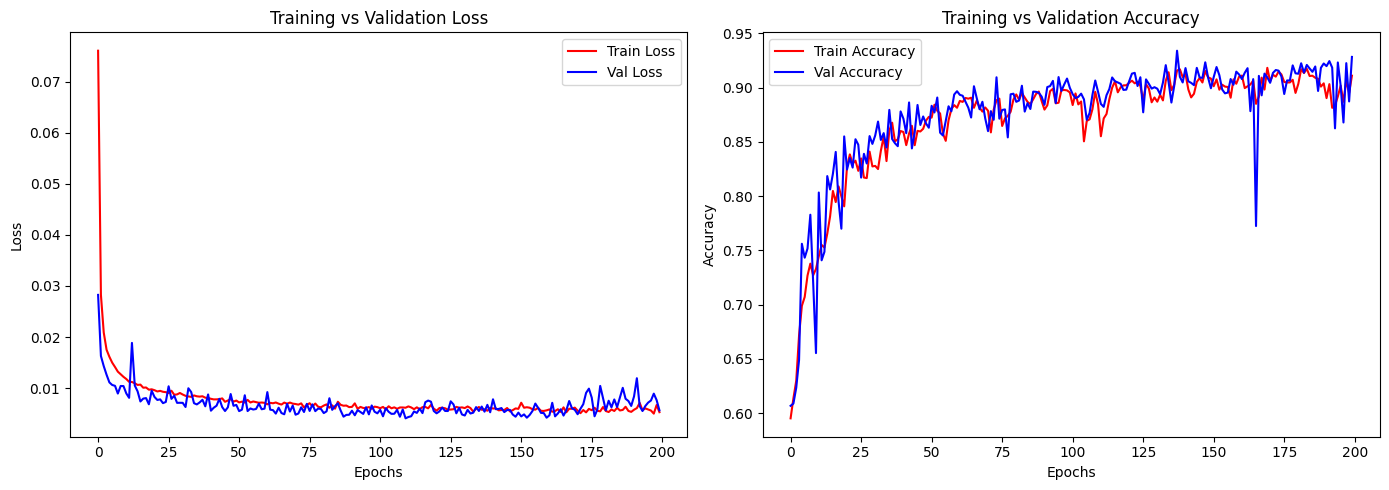

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(r.history['loss'], 'r', label='Train Loss')
axes[0].plot(r.history['val_loss'], 'b', label='Val Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss')
axes[0].legend()

axes[1].plot(r.history['accuracy'], 'r', label='Train Accuracy')
axes[1].plot(r.history['val_accuracy'], 'b', label='Val Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training vs Validation Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

In [105]:
# Dự đoán
y_pred_dl = model.predict(final_X_test)
y_pred_dl_bin = (y_pred_dl > 0.5).astype(int)

# Tính chỉ số
acc_dl = accuracy_score(y_test, y_pred_dl_bin)
precision_dl = precision_score(y_test, y_pred_dl_bin, average='macro', zero_division=0)
recall_dl = recall_score(y_test, y_pred_dl_bin, average='macro', zero_division=0)
f1_dl = f1_score(y_test, y_pred_dl_bin, average='macro', zero_division=0)

794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [106]:
# Thêm Deep Learning model và các chỉ số vào danh sách
models.append('Deep Learning')
accuracy_scores.append(acc_dl)
precision_scores.append(precision_dl)
recall_scores.append(recall_dl)
f1_scores.append(f1_dl)
hamming_losses.append(hamming_loss(y_test, y_pred_dl_bin))

In [107]:
# 1. Thêm model mới (vẫn giữ index = 16)
new_index = model_perfs.index.max() + 1
new_row = pd.DataFrame({
    'Model': ['Deep Learning'],
    'Accuracy': [acc_dl],
    'Precision': [precision_dl],
    'Recall': [recall_dl],
    'F1': [f1_dl]
}, index=[new_index])

model_perfs = pd.concat([model_perfs, new_row])

# 2. Tạo DataFrame hiển thị (không đụng gì đến index)
display_df = model_perfs.copy()

# 3. Sắp xếp theo Accuracy (index giữ nguyên)
display_df = display_df.sort_values(by='Accuracy', ascending=False)

# 4. Tạo cột STT từ 0 đến N để hiển thị
display_df.insert(0, 'STT', range(1, len(display_df) + 1))  # bắt đầu từ 1 nếu muốn

display_df

STT                                              Model  Accuracy  \
15    1  OneVsRestClassifier(estimator=StackingClassifi...  1.000000   
14    2  OneVsRestClassifier(estimator=VotingClassifier...  1.000000   
8     3  OneVsRestClassifier(estimator=GradientBoosting...  1.000000   
9     4  OneVsRestClassifier(estimator=AdaBoostClassifi...  0.999961   
10    5  OneVsRestClassifier(estimator=BaggingClassifie...  0.999921   
6     6  OneVsRestClassifier(estimator=DecisionTreeClas...  0.999803   
7     7  OneVsRestClassifier(estimator=RandomForestClas...  0.998385   
13    8  OneVsRestClassifier(estimator=<catboost.core.C...  0.997598   
12    9  OneVsRestClassifier(estimator=XGBClassifier(ba...  0.997204   
16   10                                      Deep Learning  0.992832   
2    11               OneVsRestClassifier(estimator=SVC())  0.966525   
11   12  OneVsRestClassifier(estimator=ExtraTreesClassi...  0.953017   
1    13  OneVsRestClassifier(estimator=KNeighborsClassi...  0.850504   
0    14  OneVsRestClassifier(estimator=LogisticRegressi...  0.797889   
3    15         OneVsRestClassifier(estimator=LinearSVC())  0.795959   
4    16        OneVsRestClassifier(estimator=GaussianNB())  0.530167   
5    17       OneVsRestClassifier(estimator=BernoulliNB())  0.376063   

    Precision    Recall        F1  
15   1.000000  1.000000  1.000000  
14   1.000000  1.000000  1.000000  
8    1.000000  1.000000  1.000000  
9    0.999858  1.000000  0.999929  
10   0.999781  1.000000  0.999890  
6    0.999357  1.000000  0.999678  
7    0.998885  0.999599  0.999240  
13   0.999088  0.998303  0.998693  
12   0.998912  0.999081  0.998996  
16   0.996994  0.995857  0.996421  
2    0.988014  0.987883  0.987926  
11   0.985430  0.968297  0.975834  
1    0.929519  0.920034  0.923802  
0    0.948400  0.958275  0.953053  
3    0.949728  0.958252  0.953652  
4    0.743146  0.933523  0.816152  
5    0.647693  0.868233  0.732111

In [108]:
best_model = models[8]
best_model

OneVsRestClassifier(estimator=GradientBoostingClassifier(random_state=42))

In [109]:
avg_cv_scores = cross_val_score(best_model,final_X_test,y_test,scoring='accuracy',cv=RepeatedKFold(n_repeats=3,n_splits=4),verbose=2)
mean_score = round(np.mean(avg_cv_scores),4)
print(f"Mean Cross Validation Performance of StackingClassifier: {mean_score*100}%")

[CV] END .................................................... total time=  54.1s
[CV] END .................................................... total time=  53.8s
[CV] END .................................................... total time=  52.7s
[CV] END .................................................... total time=  53.2s
[CV] END .................................................... total time=  55.5s
[CV] END .................................................... total time=  53.0s
[CV] END .................................................... total time=  53.5s
[CV] END .................................................... total time=  55.1s
[CV] END .................................................... total time= 1.0min
[CV] END .................................................... total time=  56.4s
[CV] END .................................................... total time=  56.8s
[CV] END .................................................... total time=  54.0s
Mean Cross Validation Perfor

## Saving the best performing model for deployment into production

In [110]:
with open('/content/drive/MyDrive/DACN3/source/gbC.pkl', 'wb') as f:
    pickle.dump(best_model, f, protocol=4)

with open('/content/drive/MyDrive/DACN3/source/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f, protocol=4)

with open('/content/drive/MyDrive/DACN3/source/label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f, protocol=4)

model.save('/content/drive/My Drive/DACN3/source/deep.keras')

In [111]:
with open('/content/drive/MyDrive/DACN3/source/best_grid_gb.pkl', 'wb') as f:
    pickle.dump(grid_gb.best_estimator_, f, protocol=4)

In [112]:
gc.collect()

1575